<a href="https://colab.research.google.com/github/najlaatikahdwirahma/FinalProject/blob/main/Data_Preprocessing_coba_(dyang).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Customer

In [ ]:
df_customer=pd.read_parquet('/content/drive/MyDrive/[DS Final Project] Team Athena/Dataset Parquet/customer.parquet')
df_customer.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16


#### Data Cleaning

In [ ]:
#Mengubah tipe data object menjadi category pada dataset customer
df_customer[['gender', 'device_type', 'device_version', 'home_location', 'home_country']] = df_customer[[
    'gender', 'device_type', 'device_version', 'home_location', 'home_country'
]].astype('category')

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   customer_id         100000 non-null  int64   
 1   first_name          100000 non-null  object  
 2   last_name           100000 non-null  object  
 3   username            100000 non-null  object  
 4   email               100000 non-null  object  
 5   gender              100000 non-null  category
 6   birthdate           100000 non-null  object  
 7   device_type         100000 non-null  category
 8   device_id           100000 non-null  object  
 9   device_version      100000 non-null  category
 10  home_location_lat   100000 non-null  float64 
 11  home_location_long  100000 non-null  float64 
 12  home_location       100000 non-null  category
 13  home_country        100000 non-null  category
 14  first_join_date     100000 non-null  object  
dtypes: category(5), fl

In [ ]:
# Mengecek missing value
df_customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [ ]:
# Mengecek jumlah data yang duplikat
df_customer.duplicated().sum()

0

In [ ]:
# Mengecek data unique pada tiap kolom
df_customer.nunique()

customer_id           100000
first_name               707
last_name                173
username              100000
email                 100000
gender                     2
birthdate              13003
device_type                2
device_id             100000
device_version            86
home_location_lat      71427
home_location_long     71427
home_location             33
home_country               1
first_join_date         2223
dtype: int64

<Axes: >

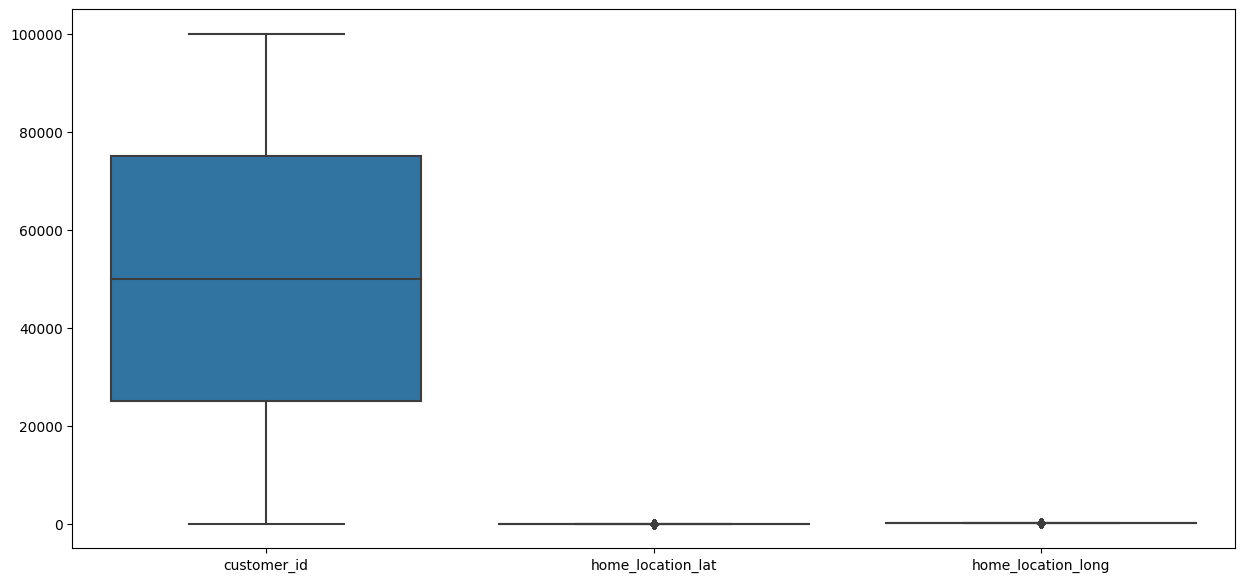

In [ ]:
# Menampilkan boxplot dari fitur-fitur numerik untuk mengecek outlier
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.boxplot(data=df_customer)

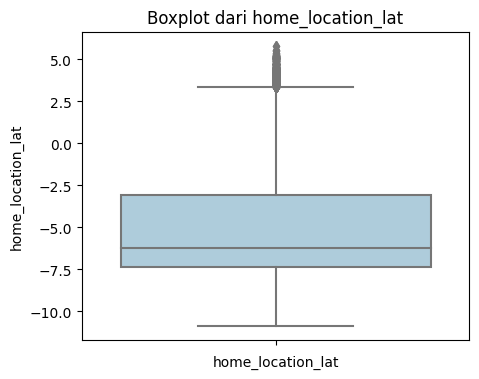

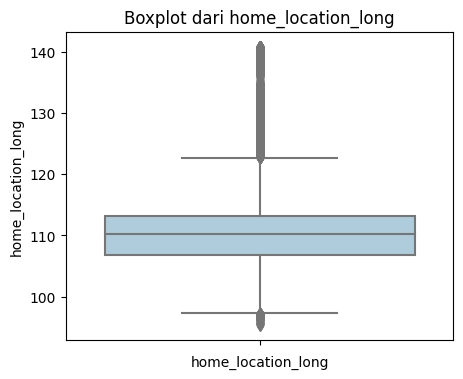

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerik yang akan diperiksa untuk outlier
kolom_numerik = ['home_location_lat', 'home_location_long']

# Menambahkan warna
palette = sns.color_palette("Paired")

# Iterasi melalui kolom numerik dan membuat boxplot
for feature in kolom_numerik:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=feature, data=df_customer, palette=palette)
    plt.title(f'Boxplot dari {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
import numpy as np

# Kuartil bawah
q1 = np.percentile(df_customer['home_location_lat'], 25)
# Kuartil atas
q3 = np.percentile(df_customer['home_location_lat'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_customer = df_customer[(df_customer['home_location_lat'] >= lower_bound) & (df_customer['home_location_lat'] <= upper_bound)]

In [ ]:
# Kuartil bawah
q1 = np.percentile(df_customer['home_location_long'], 25)
# Kuartil atas
q3 = np.percentile(df_customer['home_location_long'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_customer = df_customer[(df_customer['home_location_long'] >= lower_bound) & (df_customer['home_location_long'] <= upper_bound)]

### Dataset Product

In [ ]:
df_product=pd.read_parquet('/content/drive/MyDrive/[DS Final Project] Team Athena/Dataset Parquet/product.parquet')
df_product.head(2)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,None,None
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,None,None


#### Data Cleaning

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
 10  Unnamed: 10         21 non-null     object 
 11  Unnamed: 11         2 non-null      object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
# Menghapus kolom 'Unnamed: 10' dan 'Unnamed: 11' dari DataFrame
df_product = df_product.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1)

In [ ]:
# Mengecek jumlah data yang duplikat
df_product.duplicated().sum()

0

<Axes: >

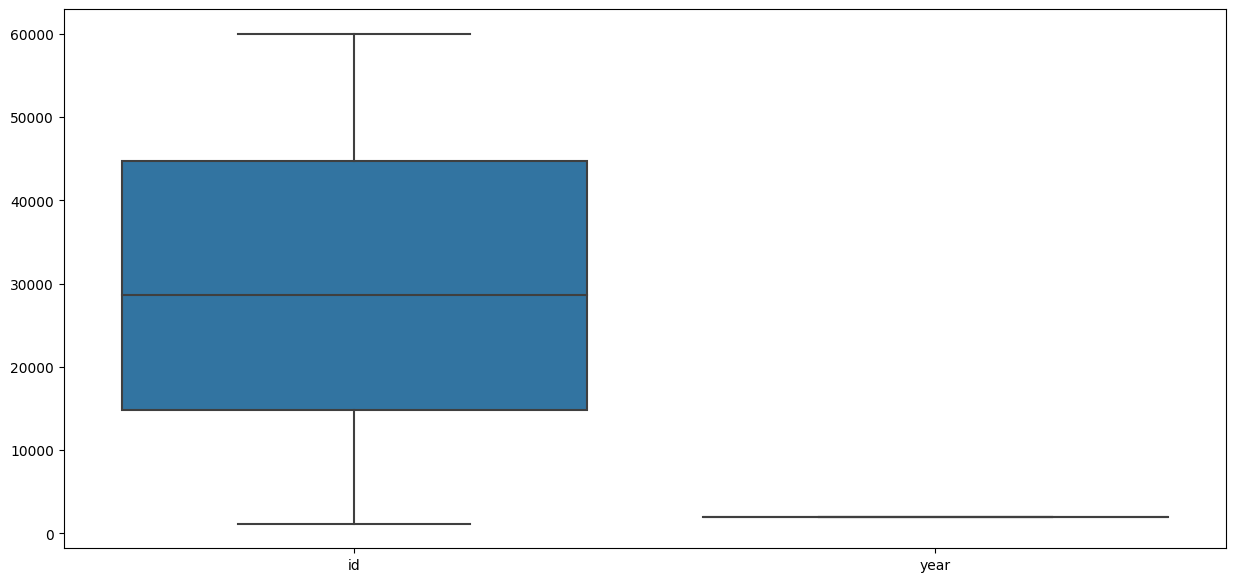

In [ ]:
# Menampilkan boxplot dari fitur-fitur numerik untuk mengecek outlier
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.boxplot(data=df_product)

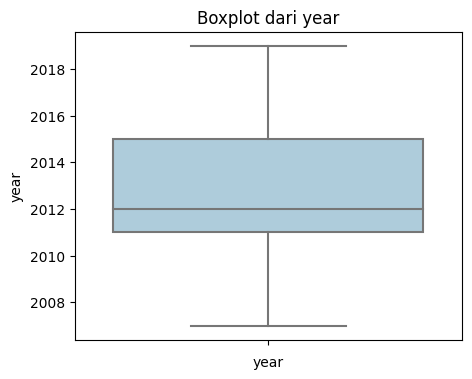

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerik yang akan diperiksa untuk outlier
kolom_numerik = ['year']

# Menambahkan warna
palette = sns.color_palette("Paired")

# Iterasi melalui kolom numerik dan membuat boxplot
for feature in kolom_numerik:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=feature, data=df_product, palette=palette)
    plt.title(f'Boxplot dari {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
# Mengecek missing value
df_product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
df_product =df_product.fillna({'baseColour':'Unknown','season':'Unknown','year':'Unknown', 'usage':'Unknown','productDisplayName':'Unknown'})

In [ ]:
df_product = df_product.fillna(method='pad')

In [ ]:
# Mengecek missing value
df_product.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

### Dataset Transactions

In [ ]:
df_transactions=pd.read_parquet('/content/drive/MyDrive/[DS Final Project] Team Athena/Dataset Parquet/transactions.parquet')
df_transactions.head(2)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526


#### Data Cleaning

In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
# Mengecek missing value
df_transactions.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [ ]:
#Isi kolom null pada 'promo_code' dengan None
df_transactions['promo_code'].fillna('None', inplace=True)
df_transactions.isnull().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
product_metadata          0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
dtype: int64

In [ ]:
# Mengecek jumlah data yang duplikat
df_transactions.duplicated().sum()

0

<Axes: >

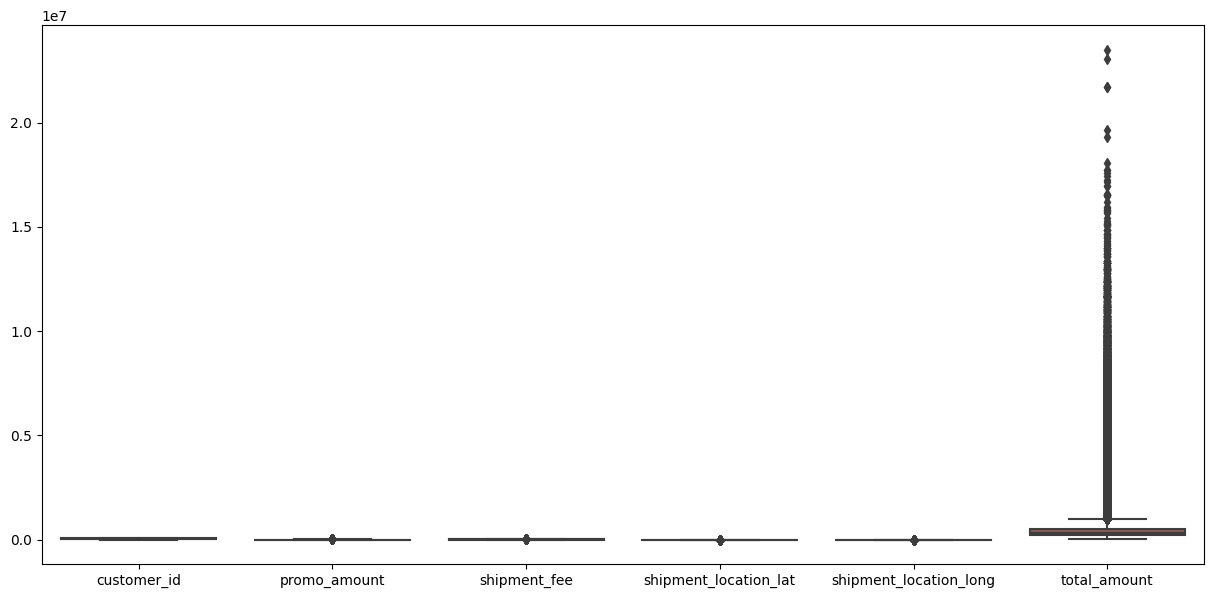

In [ ]:
# Menampilkan boxplot dari fitur-fitur numerik untuk mengecek outlier
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.boxplot(data=df_transactions)

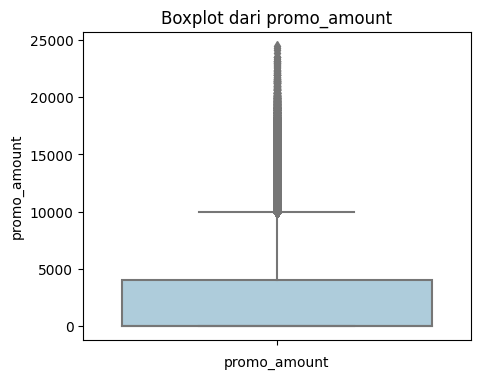

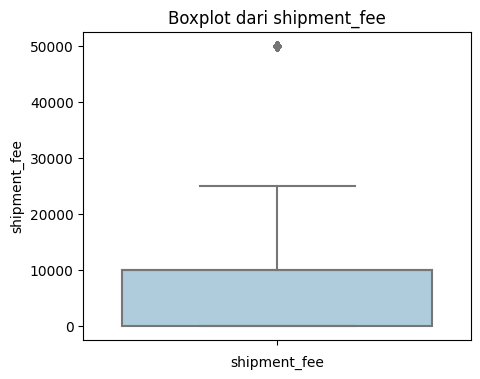

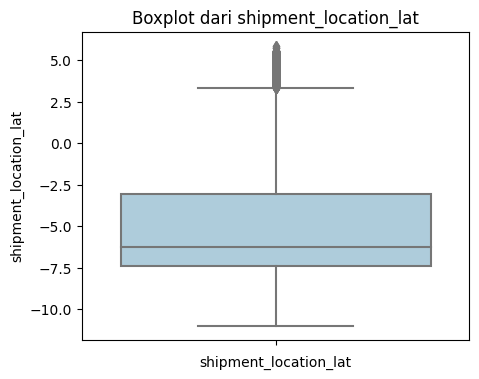

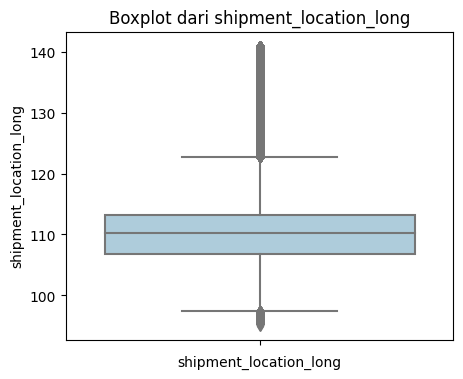

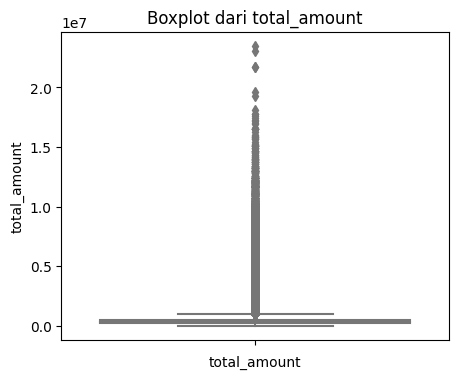

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerik yang akan diperiksa untuk outlier
kolom_numerik = ['promo_amount', 'shipment_fee', 'shipment_location_lat', 'shipment_location_long', 'total_amount']

# Menambahkan warna
palette = sns.color_palette("Paired")

# Iterasi melalui kolom numerik dan membuat boxplot
for feature in kolom_numerik:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=feature, data=df_transactions, palette=palette)
    plt.title(f'Boxplot dari {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
# Kuartil bawah
q1 = np.percentile(df_transactions['shipment_location_lat'], 25)
# Kuartil atas
q3 = np.percentile(df_transactions['shipment_location_lat'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_transactions = df_transactions[(df_transactions['shipment_location_lat'] >= lower_bound) & (df_transactions['shipment_location_lat'] <= upper_bound)]

In [ ]:
# Kuartil bawah
q1 = np.percentile(df_transactions['shipment_location_long'], 25)
# Kuartil atas
q3 = np.percentile(df_transactions['shipment_location_long'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_transactions = df_transactions[(df_transactions['shipment_location_long'] >= lower_bound) & (df_transactions['shipment_location_long'] <= upper_bound)]

In [ ]:
#  Menghapus kurung siku dari setiap baris dalam kolom 'product_metadata'
df_transactions['product_metadata'] = df_transactions['product_metadata'].apply(lambda x: x.strip('[]'))

In [ ]:
import ast

tmp = df_transactions.iloc[:,4].astype('string')
tmp = tmp.map(lambda x: ast.literal_eval(x))
tmp = tmp.to_frame()
df_transactions['product_metadata'] = tmp['product_metadata']

# explode
df_transactions = df_transactions.explode('product_metadata')
df_transactions.shape

(2473599, 14)

In [ ]:
df_transactions.head(2)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,product_id,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,quantity,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832


In [ ]:
type(df_transactions.iloc[2,4])

str

In [ ]:
import json
tmp = pd.json_normalize(df_transactions.product_metadata)

In [ ]:
df_transactions = pd.concat([df_transactions.reset_index(), tmp], join = 'outer',axis = 1)

In [ ]:
df_transactions.head(2)

,index,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,product_id,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,NaN,NaN,NaN
1,0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,quantity,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,NaN,NaN,NaN


### Data Click Stream

In [ ]:
df_click_stream=pd.read_parquet('/content/drive/MyDrive/[DS Final Project] Team Athena/Dataset Parquet/click_stream.parquet')
df_click_stream.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,None
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,None


#### Data Cleaning

In [ ]:
df_click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
df_click_stream[['event_name', 'traffic_source']] = df_click_stream[['event_name', 'traffic_source']].astype('category')
df_click_stream[['event_time']] = df_click_stream[['event_time']].astype('datetime64')

In [ ]:
# Mengecek missing value
df_click_stream.isnull().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

In [ ]:
#Isi kolom null pada 'event_metadata' dengan None
df_click_stream['event_metadata'].fillna('None', inplace=True)
df_click_stream.isnull().sum()

session_id        0
event_name        0
event_time        0
event_id          0
traffic_source    0
event_metadata    0
dtype: int64

In [ ]:
df_click_stream['traffic_source'].unique()

['MOBILE', 'WEB']
Categories (2, object): ['MOBILE', 'WEB']

In [ ]:
df_click_stream['event_name'].unique()

['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH', 'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE']
Categories (9, object): ['ADD_PROMO', 'ADD_TO_CART', 'BOOKING', 'CLICK', ..., 'ITEM_DETAIL',
                         'PROMO_PAGE', 'SCROLL', 'SEARCH']

In [ ]:
df_click_stream['event_name'].value_counts()

CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: event_name, dtype: int64

In [ ]:
# Kelompokkan df_click_stream berdasarkan event_time

click = df_click_stream[df_click_stream['event_name'] == 'CLICK']
homepage = df_click_stream[df_click_stream['event_name'] == 'HOMEPAGE']
add_to_cart = df_click_stream[df_click_stream['event_name'] == 'ADD_TO_CART']
scroll = df_click_stream[df_click_stream['event_name'] == 'SCROLL']
item_detail = df_click_stream[df_click_stream['event_name'] == 'ITEM_DETAIL']
search = df_click_stream[df_click_stream['event_name'] == 'SEARCH']
booking = df_click_stream[df_click_stream['event_name'] == 'BOOKING']
promo_page = df_click_stream[df_click_stream['event_name'] == 'PROMO_PAGE']
add_promo = df_click_stream[df_click_stream['event_name'] == 'ADD_PROMO']

In [ ]:
add_to_cart['event_metadata'].unique()

array(["{'product_id': 15315, 'quantity': 4, 'item_price': 313529}",
       "{'product_id': 6133, 'quantity': 2, 'item_price': 249443}",
       "{'product_id': 6721, 'quantity': 1, 'item_price': 134504}", ...,
       "{'product_id': 19386, 'quantity': 1, 'item_price': 208644}",
       "{'product_id': 13143, 'quantity': 1, 'item_price': 284949}",
       "{'product_id': 19820, 'quantity': 1, 'item_price': 88918}"],
      dtype=object)

In [ ]:
search['event_metadata'].unique()

array(["{'search_keywords': 'Dress Kondangan'}",
       "{'search_keywords': 'Tas Wanita'}",
       "{'search_keywords': 'Celana Panjang'}",
       "{'search_keywords': 'Kaos'}", "{'search_keywords': 'Sepatu'}",
       "{'search_keywords': 'Tas Kerja'}",
       "{'search_keywords': 'T-Shirt'}", "{'search_keywords': 'Topi'}",
       "{'search_keywords': 'Bekas'}", "{'search_keywords': 'Baju'}",
       "{'search_keywords': 'Thrift'}",
       "{'search_keywords': 'Sepatu Nike'}",
       "{'search_keywords': 'Dress Pesta'}",
       "{'search_keywords': 'Sepatu Adidas'}",
       "{'search_keywords': 'Second'}", "{'search_keywords': 'T-shirt'}",
       "{'search_keywords': 'Jam'}", "{'search_keywords': 'Celana'}",
       "{'search_keywords': 'Second Hand'}",
       "{'search_keywords': 'Barang Bekas'}",
       "{'search_keywords': 'Sendal'}", "{'search_keywords': 'Daster'}",
       "{'search_keywords': 'Baju Tidur'}"], dtype=object)

In [ ]:
add_promo['event_metadata'].unique()

array(["{'promo_code': 'AZ2022', 'promo_amount': 7047}",
       "{'promo_code': 'BUYMORE', 'promo_amount': 4903}",
       "{'promo_code': 'AZ2022', 'promo_amount': 6307}", ...,
       "{'promo_code': 'WEEKENDSERU', 'promo_amount': 10566}",
       "{'promo_code': 'WEEKENDSERU', 'promo_amount': 7233}",
       "{'promo_code': 'WEEKENDSERU', 'promo_amount': 12307}"],
      dtype=object)

Karena event_name **add_to_cart**, **booking**, **search**, dan **add_promo** memliki nilai event_metadata. Maka di split untuk mengeluarkan nilainya menjadi kolom baru

##### **Add To Cart**

In [ ]:
# Mengatur ulang index
add_to_cart = add_to_cart.reset_index()
add_to_cart = add_to_cart.drop('index', axis=1)
add_to_cart.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric..."


In [ ]:
# Mengubah tipe data menjadi string
add_to_cart['event_metadata'] = add_to_cart['event_metadata'].astype(str)

In [ ]:
import ast
cart = add_to_cart.iloc[:,5].astype('str')
cart = cart.map(lambda x: ast.literal_eval(x))
cart = cart.to_frame()
# Mengubah dataframe yang awal
add_to_cart['event_metadata'] = cart['event_metadata']

In [ ]:
# Mengonversi ke bentuk list dan membuat kolom baru
add_metadata = pd.DataFrame(list(add_to_cart['event_metadata']))
add_metadata.head(2)

,product_id,quantity,item_price
0,15315,4,313529
1,6133,2,249443


In [ ]:
# Menggabingkan data lama dengan data yang sudah dipecah
add_to_cart = pd.concat([add_to_cart, add_metadata], axis=1)
add_to_cart.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,product_id,quantity,item_price
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",15315,4,313529
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric...",6133,2,249443


##### **Booking**

In [ ]:
# Mengatur ulang index
booking = booking.reset_index()
booking = booking.drop('index', axis=1)
booking.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,BOOKING,2019-09-09 12:17:55.425431,3e6b12bf-2a80-4399-9afb-6bb1e0fa15bc,MOBILE,{'payment_status': 'Success'}


In [ ]:
# Mengubah tipe data menjadi string
booking['event_metadata'] = booking['event_metadata'].astype(str)

In [ ]:
book = booking.iloc[:,5].astype('str')
book = book.map(lambda x: ast.literal_eval(x))
book = book.to_frame()
# Mengubah dataframe yang awal
booking['event_metadata'] = book['event_metadata']

In [ ]:
# Mengonversi payment_status ke bentuk list dan membuat kolom baru
booking_metadata = pd.DataFrame(list(booking['event_metadata']))
booking_metadata.head(2)

,payment_status
0,Success
1,Success


In [ ]:
# Menggabungkan data lama dengan data yang sudah dipecah
booking = pd.concat([booking, booking_metadata], axis=1)
booking.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,payment_status
0,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'},Success
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,BOOKING,2019-09-09 12:17:55.425431,3e6b12bf-2a80-4399-9afb-6bb1e0fa15bc,MOBILE,{'payment_status': 'Success'},Success


In [ ]:
booking['payment_status'].value_counts()

Success    815962
Failed      36620
Name: payment_status, dtype: int64

##### **Search**

In [ ]:
# Mengatur ulang index
search = search.reset_index()
search = search.drop('index', axis=1)
search.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'}
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 05:06:26.425431,65ad97d0-9207-447e-b09d-fcc00a569824,MOBILE,{'search_keywords': 'Tas Wanita'}


In [ ]:
# Mengubah tipe data menjadi string
search['event_metadata'] = search['event_metadata'].astype(str)

In [ ]:
searching = search.iloc[:,5].astype('str')
searching = searching.map(lambda x: ast.literal_eval(x))
searching = searching.to_frame()
# Mengubah dataframe yang awal
search['event_metadata'] = searching['event_metadata']

In [ ]:
# Mengonversi search_keywords ke bentuk list dan membuat kolom baru
search_metadata = pd.DataFrame(list(search['event_metadata']))
search_metadata.head(2)

,search_keywords
0,Dress Kondangan
1,Tas Wanita


In [ ]:
# Menggabungkan data lama dengan data yang sudah dipecah
search = pd.concat([search, search_metadata], axis=1)
search.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,search_keywords
0,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'},Dress Kondangan
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 05:06:26.425431,65ad97d0-9207-447e-b09d-fcc00a569824,MOBILE,{'search_keywords': 'Tas Wanita'},Tas Wanita


##### **Add Promo**

In [ ]:
# Mengatur ulang index
add_promo = add_promo.reset_index()
add_promo = add_promo.drop('index', axis=1)
add_promo.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_PROMO,2019-09-09 07:22:05.425431,28329764-aa29-4e7a-9d8e-eee88d00a640,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 7047}"
1,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ADD_PROMO,2019-09-24 16:16:10.425431,7a808081-2384-4a3a-ad00-9f10df4f07a7,WEB,"{'promo_code': 'BUYMORE', 'promo_amount': 4903}"


In [ ]:
# Mengubah tipe data menjadi string
add_promo['event_metadata'] = add_promo['event_metadata'].astype(str)

In [ ]:
coupon = add_promo.iloc[:,5].astype('str')
coupon = coupon.map(lambda x: ast.literal_eval(x))
coupon = coupon.to_frame()
# Mengubah dataframe yang awal
add_promo['event_metadata'] = coupon['event_metadata']

In [ ]:
# Mengonversi promo_code dan promo_amount ke bentuk list dan membuat kolom baru
promo_metadata = pd.DataFrame(list(add_promo['event_metadata']))
promo_metadata.head(2)

,promo_code,promo_amount
0,AZ2022,7047
1,BUYMORE,4903


In [ ]:
# Menggabungkan data lama dengan data yang sudah dipecah
add_promo = pd.concat([add_promo, promo_metadata], axis=1)
add_promo.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,promo_code,promo_amount
0,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_PROMO,2019-09-09 07:22:05.425431,28329764-aa29-4e7a-9d8e-eee88d00a640,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 7047}",AZ2022,7047
1,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ADD_PROMO,2019-09-24 16:16:10.425431,7a808081-2384-4a3a-ad00-9f10df4f07a7,WEB,"{'promo_code': 'BUYMORE', 'promo_amount': 4903}",BUYMORE,4903


In [ ]:
add_promo['promo_code'].value_counts()

AZ2022           89227
BUYMORE          66834
WEEKENDSERU      61941
XX2022           44744
LIBURDONG        20965
WEEKENDMANTAP    20448
SC2022           11271
STARTUP          11105
Name: promo_code, dtype: int64

##### **Dataset Click Steam Baru**

In [ ]:
df_click_stream_new = df_click_stream.copy()

In [ ]:
# Join dengan menggunakan event_id
df_click_stream_new = df_click_stream_new.merge(add_to_cart[['event_id','product_id','quantity','item_price']], on='event_id', how = 'left')
df_click_stream_new = df_click_stream_new.merge(booking[['event_id','payment_status']], on='event_id', how = 'left')
df_click_stream_new = df_click_stream_new.merge(search[['event_id','search_keywords']], on='event_id', how = 'left')
df_click_stream_new = df_click_stream_new.merge(add_promo[['event_id','promo_code','promo_amount']], on='event_id', how = 'left')
df_click_stream_new.head(2)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus kolom 'event_metadata' dari DataFrame
df_click_stream_new = df_click_stream_new.drop(['event_metadata'], axis=1)

In [ ]:
df_click_stream_new['product_id'].fillna(0, inplace=True)
df_click_stream_new['quantity'].fillna(0, inplace=True)
df_click_stream_new['item_price'].fillna(0, inplace=True)
df_click_stream_new['promo_amount'].fillna(0, inplace=True)
df_click_stream_new['event_name'].fillna('Unknown', inplace=True)
df_click_stream_new['traffic_source'].fillna('Unknown', inplace=True)

In [ ]:
# Mengisi missing values dengan "Unknown"
df_click_stream_new['payment_status'].fillna('Unknown', inplace=True)

# Mengisi missing values dengan "Not Available"
df_click_stream_new['search_keywords'].fillna('Unknown', inplace=True)

# Mengisi missing values dengan "Not Available"
df_click_stream_new['promo_code'].fillna('Unknown', inplace=True)

In [ ]:
df_click_stream_new.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,0.0,0.0,0.0,Unknown,Unknown,Unknown,0.0
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,0.0,0.0,0.0,Unknown,Unknown,Unknown,0.0
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,0.0,0.0,0.0,Unknown,Unknown,Unknown,0.0
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,Unknown,Unknown,Unknown,0.0
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,0.0,0.0,0.0,Success,Unknown,Unknown,0.0


## Exploratory Data Analysis (EDA)

#### **Data Wrangling**

In [ ]:
#Mengubah tipe data object menjadi kategori
df_click_stream_new[['payment_status', 'search_keywords', 'promo_code']] = df_click_stream_new[[
    'payment_status', 'search_keywords', 'promo_code']].astype('category')

In [ ]:
#Mengubah tipe data object menjadi category pada dataset customer
df_customer[['gender', 'device_type', 'device_version', 'home_location', 'home_country']] = df_customer[[
    'gender', 'device_type', 'device_version', 'home_location', 'home_country'
]].astype('category')

In [ ]:
#Mengubah tipe data object menjadi datetime
df_customer['birthdate'] = df_customer['birthdate'].astype('datetime64')

In [ ]:
#Mengubah tipe data object menjadi category
df_product[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season',
            'usage', 'productDisplayName']] = df_product[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season',
            'usage', 'productDisplayName']].astype('category')

In [ ]:
#Mengubah kolom id menjadi product_id
df_product.rename(columns={'id' : 'product_id'}, inplace=True)

#### **Data Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

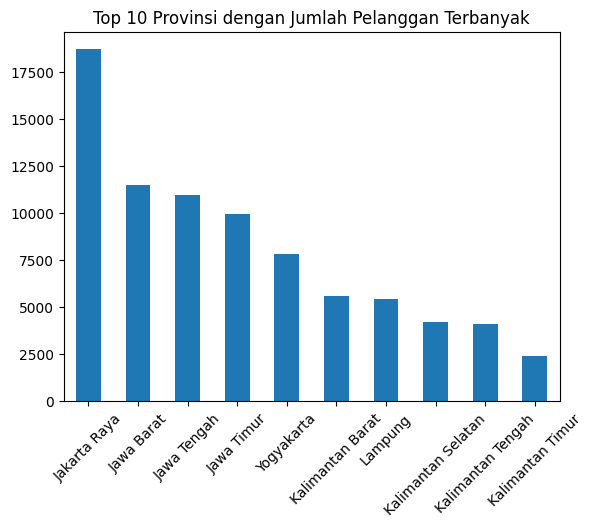

In [ ]:
# 10 Provinsi dengan customer terbanyak
df_customer['home_location'].value_counts()[:10].plot(kind='bar')
# Menambahkan judul
plt.title('Top 10 Provinsi dengan Jumlah Pelanggan Terbanyak')
plt.xticks(rotation=45)
plt.show()

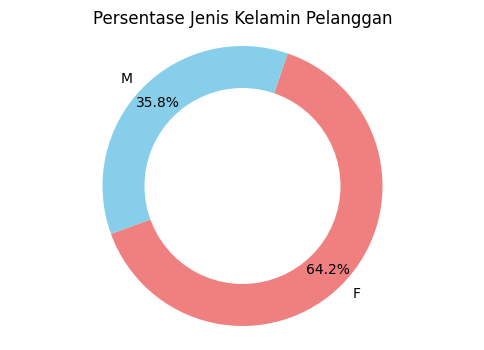

In [ ]:
# Mengambil data
gender_counts = df_customer['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightcoral', 'skyblue']

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=200, pctdistance=0.85)
plt.title("Persentase Jenis Kelamin Pelanggan")

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Tampilkan pie chart
plt.axis('equal')
plt.show()

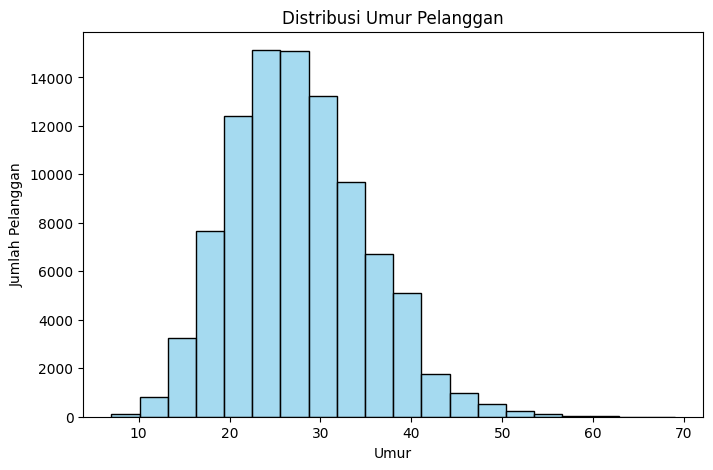

In [ ]:
# Menghitung umur pelanggan
df_customer['umur'] = 2023 - df_customer['birthdate'].dt.year

# Membuat bar chart
plt.figure(figsize=(8, 5))
sns.histplot(df_customer['umur'], bins=20, kde=False, color="skyblue")
plt.title("Distribusi Umur Pelanggan")
plt.xlabel("Umur")
plt.ylabel("Jumlah Pelanggan")
plt.grid(False)  # Menghilangkan grid
plt.show()

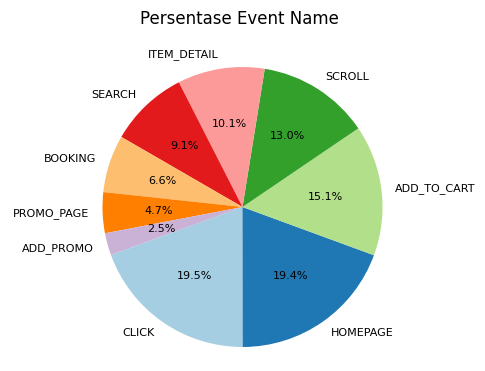

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah setiap event_name dan mengurutkannya
event_counts = df_click_stream_new["event_name"].value_counts().sort_values(ascending=False)
colors = plt.cm.Paired(range(len(event_counts)))

# Membuat diagram lingkaran
plt.figure(figsize=(6, 4))
plt.pie(event_counts, autopct='%1.1f%%', labels=event_counts.index, startangle=200, colors=colors, textprops={'fontsize': 8})
plt.title("Persentase Event Name \n")
plt.axis('equal')

plt.show()

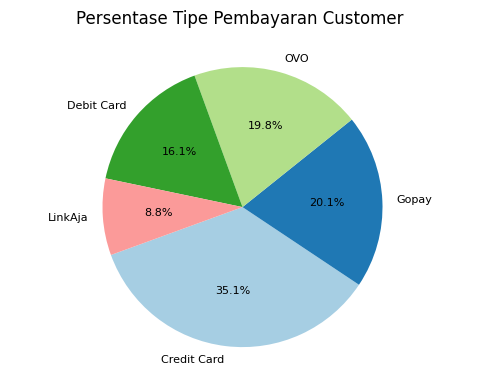

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah pembayaran customers dan mengurutkannya
payment_counts = df_transactions["payment_method"].value_counts().sort_values(ascending=False)
colors = plt.cm.Paired(range(len(payment_counts)))

# Membuat diagram lingkaran
plt.figure(figsize=(6, 4))
plt.pie(payment_counts, autopct='%1.1f%%', labels=payment_counts.index, startangle=200, colors=colors, textprops={'fontsize': 8})
plt.title("Persentase Tipe Pembayaran Customer \n")
plt.axis('equal')

plt.show()

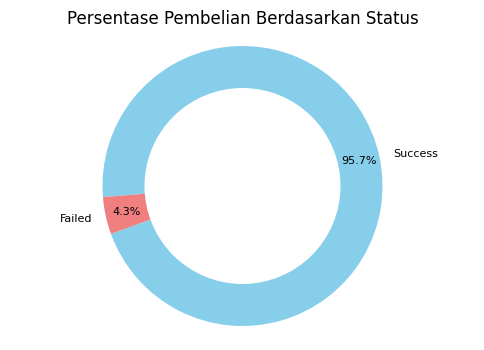

In [ ]:
# Mengambil data
paymentstatus_counts = df_transactions['payment_status'].value_counts()
labels = paymentstatus_counts.index
sizes = paymentstatus_counts.values
colors = ['skyblue', 'lightcoral']

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=200, pctdistance=0.85,textprops={'fontsize': 8})
plt.title("Persentase Pembelian Berdasarkan Status")

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Tampilkan pie chart
plt.axis('equal')
plt.show()

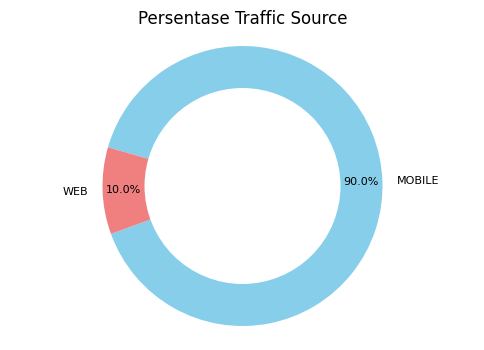

In [ ]:
# Mengambil data
traffic_counts = df_click_stream_new['traffic_source'].value_counts()
labels = traffic_counts.index
sizes = traffic_counts.values
colors = ['skyblue', 'lightcoral']

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=200, pctdistance=0.85,textprops={'fontsize': 8})
plt.title("Persentase Traffic Source")

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Tampilkan pie chart
plt.axis('equal')
plt.show()

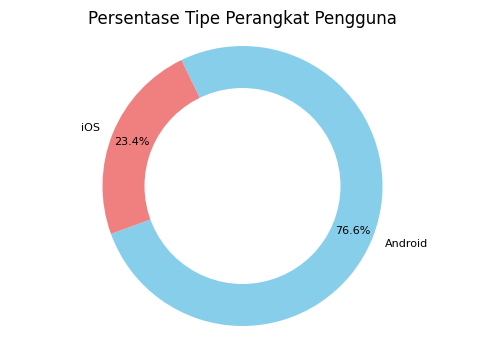

In [ ]:
# Mengambil data
device_counts = df_customer['device_type'].value_counts()
labels = device_counts.index
sizes = device_counts.values
colors = ['skyblue', 'lightcoral']

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=200, pctdistance=0.85,textprops={'fontsize': 8})
plt.title("Persentase Tipe Perangkat Pengguna")

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Tampilkan pie chart
plt.axis('equal')
plt.show()

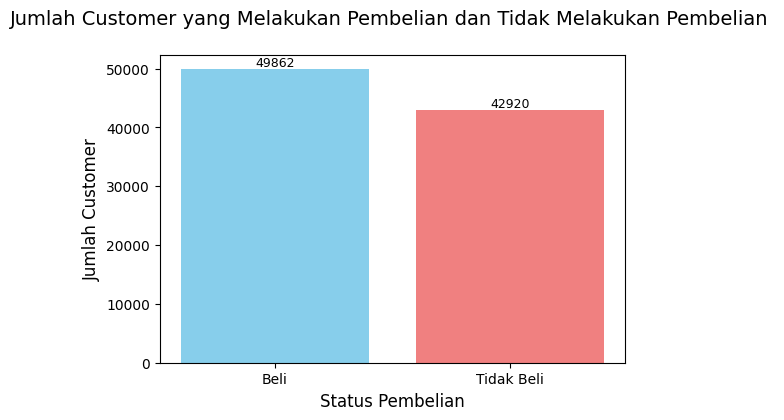

In [ ]:
# Menghitung jumlah customer beli dan tidak beli
jumlah_customer = df_customer['customer_id'].nunique()
jumlah_beli = df_transactions['customer_id'].nunique()
jumlah_tdk_beli = jumlah_customer - jumlah_beli

# Data
labels = ['Beli', 'Tidak Beli']
data = [jumlah_beli, jumlah_tdk_beli]

# Membuat bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, data, color=['skyblue', 'lightcoral'])

# Menambahkan label nilai di atas tiap bar
for i, v in enumerate(data):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Menambahkan label
plt.xlabel('Status Pembelian', fontsize=12)
plt.ylabel('Jumlah Customer', fontsize=12)
plt.title('Jumlah Customer yang Melakukan Pembelian dan Tidak Melakukan Pembelian \n', fontsize=14)

plt.show()

<Axes: xlabel='month_join', ylabel='customers_join'>

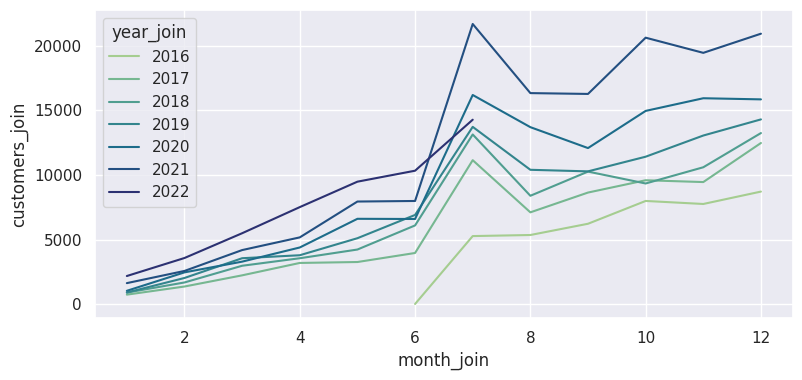

In [ ]:
date = df_customer.copy()
date['first_join_date'] = date['first_join_date'].astype('datetime64')
date['year_join'] = date['first_join_date'].dt.year # Partisi berdasarkan year
date['month_join'] = date['first_join_date'].dt.month # Partisi bedasarkan month

month = date.groupby(['year_join', 'month_join']).agg(
    customers_join = pd.NamedAgg(column = 'month_join', aggfunc = sum))  # Membuat kolom customers_join
month.reset_index(inplace=True)

sns.set(rc={"figure.figsize":(9, 4)})
sns.lineplot(data=month, x="month_join", y="customers_join", hue="year_join", palette="crest")

In [ ]:
# Konversi kolom tanggal pesanan (created_at) ke tipe data datetime
df_transactions['created_at'] = pd.to_datetime(df_transactions['created_at'])

# Filter baris-baris dengan payment_status "Success"
success_orders = df_transactions[df_transactions['payment_status'] == 'Success']

# Mengelompokkan data berdasarkan bulan dan tahun pada kolom created_at
monthly_order = success_orders.groupby(success_orders['created_at'].dt.to_period('M')).size()

<ipython-input-94-e75c1176a17f>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_order = success_orders.groupby(success_orders['created_at'].dt.to_period('M')).size()


In [ ]:
monthly_order

created_at
2016-06        3
2016-07      780
2016-08     1541
2016-09     1967
2016-10     2802
           ...  
2022-03    79787
2022-04    81417
2022-05    83683
2022-06    79457
2022-07    70098
Freq: M, Length: 74, dtype: int64

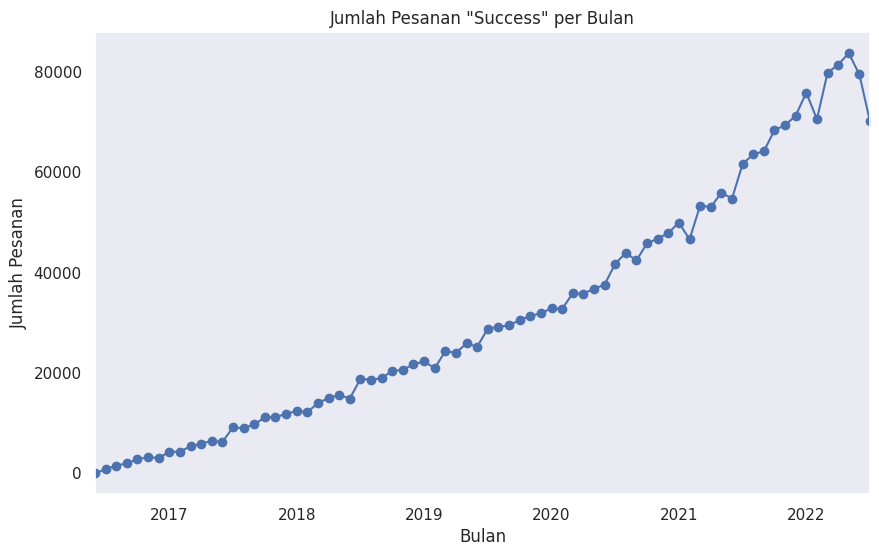

In [ ]:
# Plot grafik
plt.figure(figsize=(10, 6))
monthly_order.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Jumlah Pesanan "Success" per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(False)

plt.show()

Penjualan Tahun 2017

<ipython-input-97-8d3fd078ad26>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_order_2017 = orders_2017.groupby(orders_2017['created_at'].dt.to_period('M')).size()


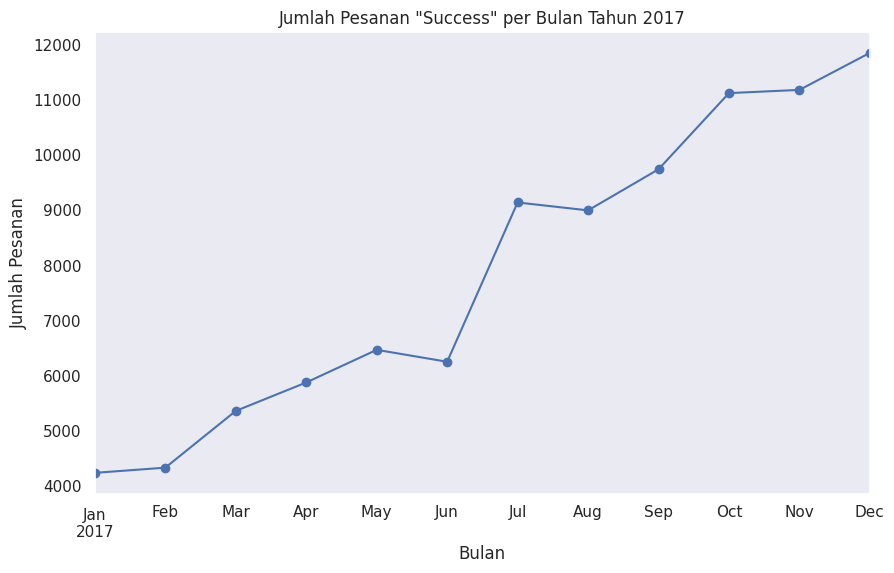

In [ ]:
# Filter baris-baris dengan payment_status "Success" dan tahun 2017
orders_2017 = df_transactions[(df_transactions['payment_status'] == 'Success') & (df_transactions['created_at'].dt.year == 2017)]

# Mengelompokkan data berdasarkan bulan pada kolom created_at
monthly_order_2017 = orders_2017.groupby(orders_2017['created_at'].dt.to_period('M')).size()

# Plot grafik
plt.figure(figsize=(10, 6))
monthly_order_2017.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Jumlah Pesanan "Success" per Bulan Tahun 2017')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(False)

plt.show()

Penjualan Tahun 2018

<ipython-input-98-52c722e69dd4>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_order_2018 = orders_2018.groupby(orders_2018['created_at'].dt.to_period('M')).size()


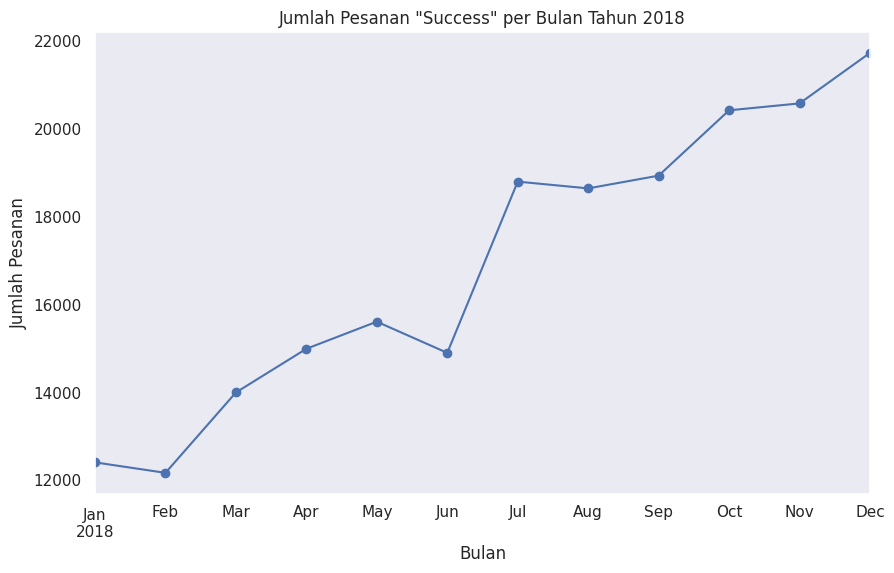

In [ ]:
# Filter baris-baris dengan payment_status "Success" dan tahun 2018
orders_2018 = df_transactions[(df_transactions['payment_status'] == 'Success') & (df_transactions['created_at'].dt.year == 2018)]

# Mengelompokkan data berdasarkan bulan pada kolom created_at
monthly_order_2018 = orders_2018.groupby(orders_2018['created_at'].dt.to_period('M')).size()

# Plot grafik
plt.figure(figsize=(10, 6))
monthly_order_2018.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Jumlah Pesanan "Success" per Bulan Tahun 2018')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(False)

plt.show()

Penjualan Tahun 2019

<ipython-input-99-1b3f1c9b79cf>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_order_2019 = orders_2019.groupby(orders_2019['created_at'].dt.to_period('M')).size()


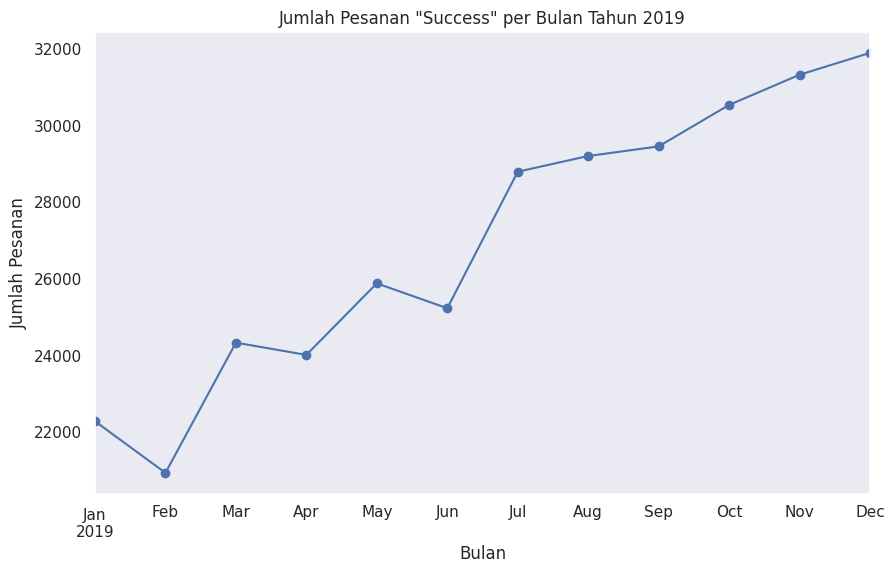

In [ ]:
# Filter baris-baris dengan payment_status "Success" dan tahun 2019
orders_2019 = df_transactions[(df_transactions['payment_status'] == 'Success') & (df_transactions['created_at'].dt.year == 2019)]

# Mengelompokkan data berdasarkan bulan pada kolom created_at
monthly_order_2019 = orders_2019.groupby(orders_2019['created_at'].dt.to_period('M')).size()

# Plot grafik
plt.figure(figsize=(10, 6))
monthly_order_2019.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Jumlah Pesanan "Success" per Bulan Tahun 2019')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(False)

plt.show()

Penjualan Tahun 2020

<ipython-input-100-24cfefafa5ea>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_order_2020 = orders_2020.groupby(orders_2020['created_at'].dt.to_period('M')).size()


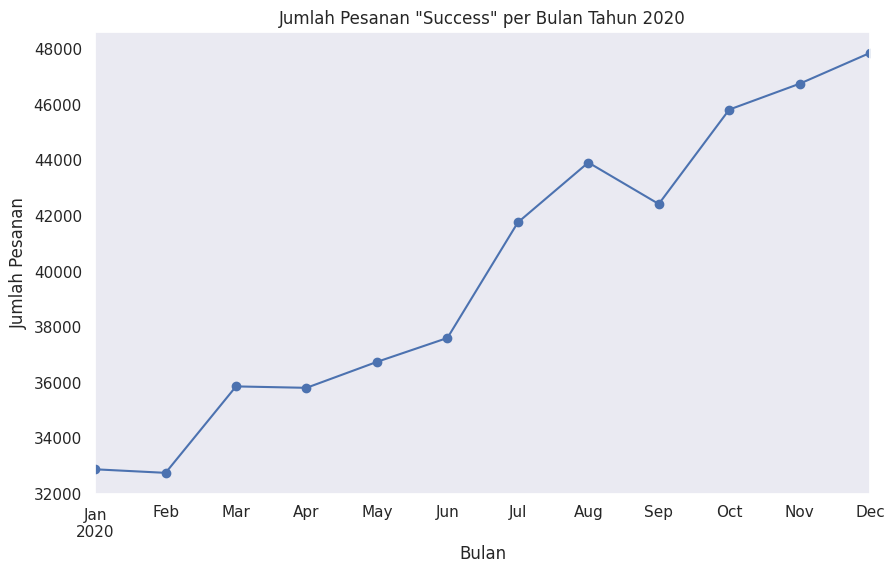

In [ ]:
# Filter baris-baris dengan payment_status "Success" dan tahun 2020
orders_2020 = df_transactions[(df_transactions['payment_status'] == 'Success') & (df_transactions['created_at'].dt.year == 2020)]

# Mengelompokkan data berdasarkan bulan pada kolom created_at
monthly_order_2020 = orders_2020.groupby(orders_2020['created_at'].dt.to_period('M')).size()

# Plot grafik
plt.figure(figsize=(10, 6))
monthly_order_2020.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Jumlah Pesanan "Success" per Bulan Tahun 2020')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(False)

plt.show()

Penjualan Tahun 2021

<ipython-input-101-f0e9e2d81d6b>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_order_2021 = orders_2021.groupby(orders_2021['created_at'].dt.to_period('M')).size()


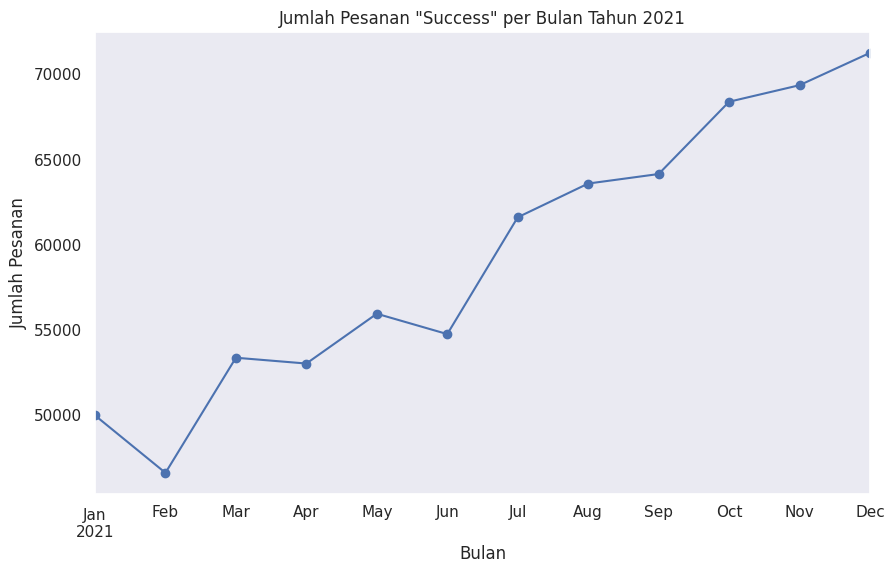

In [ ]:
# Filter baris-baris dengan payment_status "Success" dan tahun 2021
orders_2021 = df_transactions[(df_transactions['payment_status'] == 'Success') & (df_transactions['created_at'].dt.year == 2021)]

# Mengelompokkan data berdasarkan bulan pada kolom created_at
monthly_order_2021 = orders_2021.groupby(orders_2021['created_at'].dt.to_period('M')).size()

# Plot grafik
plt.figure(figsize=(10, 6))
monthly_order_2021.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Jumlah Pesanan "Success" per Bulan Tahun 2021')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(False)

plt.show()

Penjualan Tahun 2022

<ipython-input-102-1382035b69ea>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_order_2022 = orders_2022.groupby(orders_2022['created_at'].dt.to_period('M')).size()


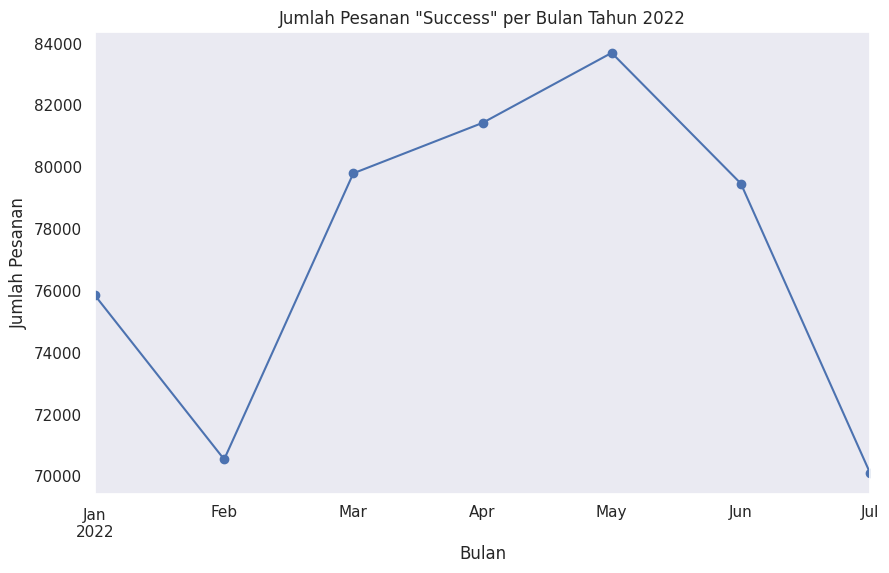

In [ ]:
# Filter baris-baris dengan payment_status "Success" dan tahun 2022
orders_2022 = df_transactions[(df_transactions['payment_status'] == 'Success') & (df_transactions['created_at'].dt.year == 2022)]

# Mengelompokkan data berdasarkan bulan pada kolom created_at
monthly_order_2022 = orders_2022.groupby(orders_2022['created_at'].dt.to_period('M')).size()

# Plot grafik
plt.figure(figsize=(10, 6))
monthly_order_2022.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Jumlah Pesanan "Success" per Bulan Tahun 2022')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(False)

plt.show()

In [ ]:
# Konversi kolom tanggal pesanan (created_at) ke tipe data datetime jika belum dalam format yang benar
df_transactions['created_at'] = pd.to_datetime(df_transactions['created_at'])

# Filter baris-baris dengan payment_status "Success"
success_orders = df_transactions[df_transactions['payment_status'] == 'Success']

# Mengelompokkan data berdasarkan bulan dan tahun pada kolom created_at dan menjumlahkan total_amount
monthly_revenue = success_orders.groupby(success_orders['created_at'].dt.to_period('M'))['total_amount'].sum()

# Mengonversi total pendapatan ke milyar rupiah
monthly_revenue = monthly_revenue / 1000000000

<ipython-input-103-87f64400e355>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_revenue = success_orders.groupby(success_orders['created_at'].dt.to_period('M'))['total_amount'].sum()


In [ ]:
monthly_revenue

created_at
2016-06     0.001922
2016-07     0.403256
2016-08     1.559752
2016-09     1.554388
2016-10     2.324429
             ...    
2022-03    60.765516
2022-04    61.436127
2022-05    63.572502
2022-06    59.673238
2022-07    53.158306
Freq: M, Name: total_amount, Length: 74, dtype: float64

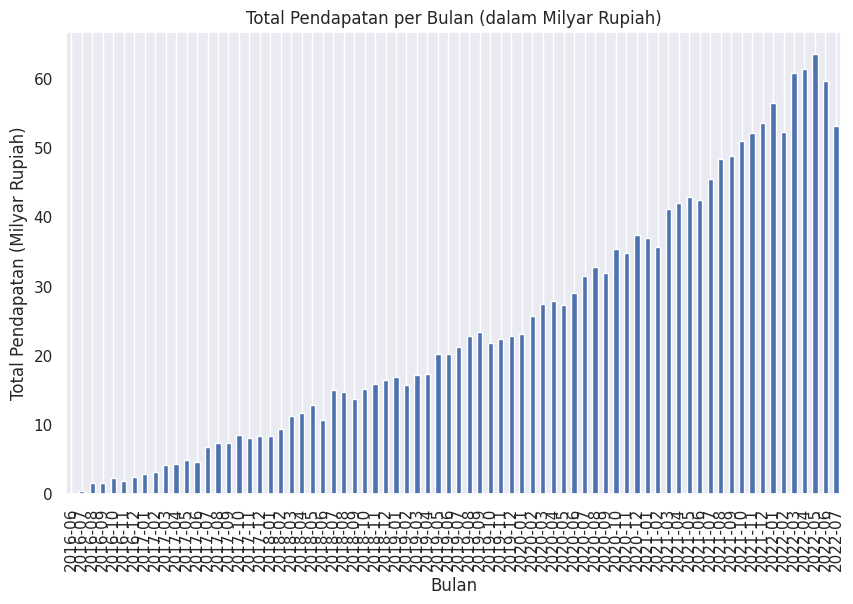

In [ ]:
# Plot grafik total pendapatan per bulan dalam milyar rupiah
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='b')
plt.title('Total Pendapatan per Bulan (dalam Milyar Rupiah)')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan (Milyar Rupiah)')
plt.grid(axis='y')

plt.show()

#### EDA Statistik

In [ ]:
# Statistik deskriptif
df_customer.describe()

,customer_id,home_location_lat,home_location_long,umur
count,92782.000000,92782.000000,92782.000000,92782.000000
mean,49995.571070,-5.359474,109.769258,27.519896
std,28880.459211,2.865027,4.127936,7.283416
min,1.000000,-10.599294,97.462606,7.000000
25%,24959.250000,-7.417521,106.843588,22.000000
50%,50033.500000,-6.279717,109.722512,27.000000
75%,75005.750000,-3.597066,112.262514,32.000000
max,100000.000000,3.327649,122.535281,69.000000


In [ ]:
# Statistik deskriptif
df_product.describe()

,product_id
count,44446.000000
mean,29692.631350
std,17048.234982
min,1163.000000
25%,14770.250000
50%,28609.500000
75%,44678.750000
max,60000.000000


In [ ]:
# Statistik deskriptif
df_transactions.describe()

,index,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
count,2.473599e+06,2.473599e+06,2.473599e+06,2.473599e+06,2.473599e+06,2.473599e+06,2.473599e+06,507606.000000,507606.000000,5.076060e+05
mean,4.260387e+05,4.983081e+04,2.044820e+03,9.186230e+03,-5.361787e+00,1.097731e+02,7.544853e+05,29717.588222,1.472603,2.500368e+05
std,2.460024e+05,2.898617e+04,3.065598e+03,9.359349e+03,2.864852e+00,4.134379e+00,1.294219e+06,17043.311385,1.581631,1.119595e+05
min,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,-1.082646e+01,9.743864e+01,1.089800e+04,1163.000000,1.000000,5.600000e+03
25%,2.132505e+05,2.454500e+04,0.000000e+00,0.000000e+00,-7.423698e+00,1.068475e+02,2.078550e+05,14821.000000,1.000000,1.683472e+05
50%,4.255580e+05,4.963700e+04,0.000000e+00,1.000000e+04,-6.280407e+00,1.097175e+02,3.144550e+05,28613.000000,1.000000,2.336585e+05
75%,6.394080e+05,7.493100e+04,3.998000e+03,1.000000e+04,-3.559046e+00,1.122811e+02,6.211670e+05,44712.000000,1.000000,3.137610e+05
max,8.525830e+05,9.999900e+04,2.451900e+04,5.000000e+04,3.345685e+00,1.225782e+02,2.170382e+07,60000.000000,40.000000,1.144107e+06


In [ ]:
# Statistik deskriptif
df_click_stream_new.describe()

,product_id,quantity,item_price,promo_amount
count,1.283360e+07,1.283360e+07,1.283360e+07,1.283360e+07
mean,4.395727e+03,2.173362e-01,4.039879e+04,1.356625e+02
std,1.234690e+04,7.747922e-01,1.062442e+05,9.392033e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.000000e+04,4.800000e+01,1.335959e+06,2.451900e+04


<ipython-input-110-398acff9cbec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_customer.corr()


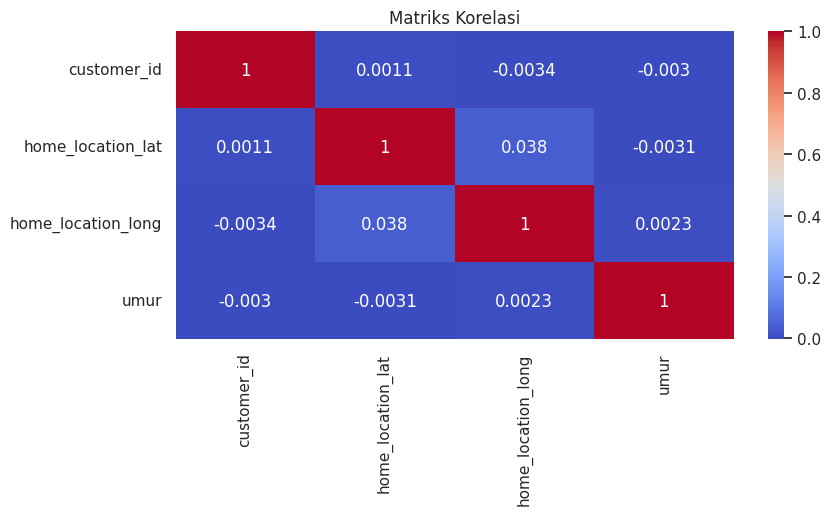

In [ ]:
# Korelasi
correlation_matrix = df_customer.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

<ipython-input-111-907a5a665d8b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_transactions.corr()


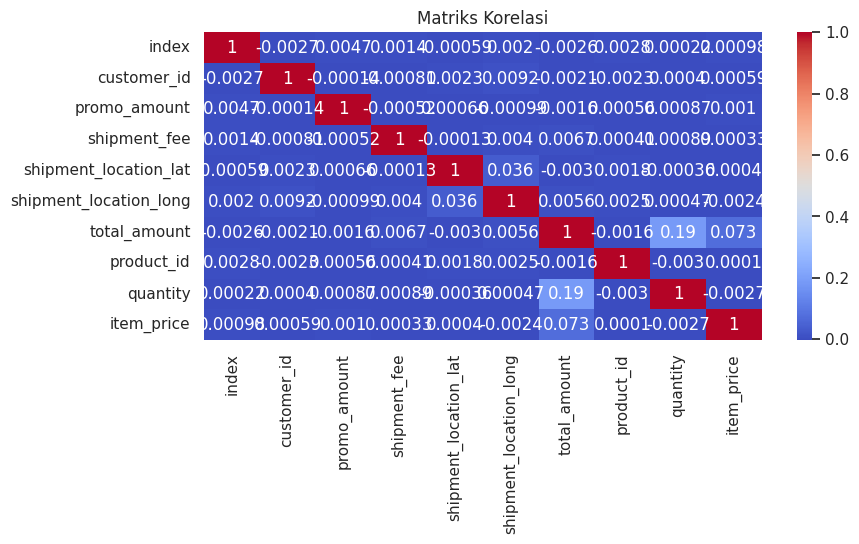

In [ ]:
# Korelasi
correlation_matrix = df_transactions.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
# Box plot untuk kolom numerik
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df_customer, x='umur')
# plt.xlabel('Umur')
# plt.title('Box Plot Umur Pelanggan')
# plt.show()

## Feature Engineering

### Feature Dataset

In [ ]:
#Membuat fitur lama berlangganan

from datetime import datetime
# Konversi kolom 'first_join_date' menjadi tipe data datetime
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

# Hitung lama berlangganan dalam tahun
current_date = datetime.now()
df_customer['subscription_duration'] = ((current_date - df_customer['first_join_date']).dt.days)/365

# Menampilkan DataFrame yang sudah digabungkan
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,umur,subscription_duration
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,27,4.353425
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,30,6.367123
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,34,3.260274
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,32,2.147945
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,23,2.627397


In [ ]:
# Melakukan join dataset df_customer dengan df_transaction berdasarkan kolom customer_id
df_merged = df_customer.merge(df_transactions, on='customer_id', how='inner')

In [ ]:
df_merged.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,...,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,...,2853,WEEKENDSERU,15000,2020-08-26T05:14:04.908999Z,0.62107,111.101844,844751,18015.0,1.0,305982.0
1,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,...,2853,WEEKENDSERU,15000,2020-08-26T05:14:04.908999Z,0.62107,111.101844,844751,2401.0,2.0,263311.0


In [ ]:
# Filter data transaksi untuk hanya data dengan payment_status "Success"
success_transactions = df_transactions[df_transactions['payment_status'] == 'Success']

# Mengelompokkan berdasarkan 'customer_id' dan menghitung rata-rata total belanja
average_spending = success_transactions.groupby('customer_id')['total_amount'].mean()

# Menggabungkan rata-rata total belanja ke dalam DataFrame customer
df_customer['average_spending'] = df_customer['customer_id'].map(average_spending)

In [ ]:
# Grouping berdasarkan 'customer_id' dan menghitung rata-rata total belanja
average_spending = df_merged.groupby('customer_id')['total_amount'].mean()

# Menggabungkan
df_merged = df_customer.merge(average_spending, on='customer_id', how='left')

# Kolom baeu'average_spending' untuk menghitung rata-rata total belanja
df_merged.rename(columns={'total_amount': 'average_spending'}, inplace=True)

In [ ]:
df_merged.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,umur,subscription_duration,average_spending,average_spending
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,27,4.353425,NaN,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,30,6.367123,NaN,NaN


In [ ]:
def spending_category(average_spending):
  if pd.isna(average_spending):
    return "None"
  elif average_spending <= 50000:
    return "Bronze"
  elif 51000 <= average_spending <= 200000:
    return "Silver"
  elif 200001 <= average_spending <= 500000:
    return "Gold"
  else :
    return "Platinum"

# Untuk memanggil data
df_customer['spending_category'] = df_customer['average_spending'].apply(spending_category)
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,umur,subscription_duration,average_spending,spending_category
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,27,4.353425,NaN,None
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,30,6.367123,NaN,None
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,34,3.260274,701269.422886,Platinum
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,32,2.147945,NaN,None
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,23,2.627397,115702.000000,Silver


In [ ]:
# Filter pelanggan dengan spending_category 'Platinum'
platinum_customers = df_customer[df_customer['spending_category'] == 'Platinum']
platinum_customer = platinum_customers[['customer_id', 'first_name', 'last_name','spending_category']]
platinum_customer.head()

,customer_id,first_name,last_name,spending_category
2,7279,Bakiman,Simanjuntak,Platinum
8,8031,Ana,Laksmiwati,Platinum
14,94370,Septi,Winarsih,Platinum
16,72106,Zulfa,Laksita,Platinum
17,97883,Septi,Nasyidah,Platinum


In [ ]:
# Filter pelanggan dengan spending_category 'Gold'
gold_customers = df_customer[df_customer['spending_category'] == 'Gold']
gold_customer = gold_customers[['customer_id', 'first_name', 'last_name','spending_category']]
gold_customer.head()

,customer_id,first_name,last_name,spending_category
7,96453,Talia,Hastuti,Gold
13,22199,Ridwan,Nugroho,Gold
15,73093,Elisa,Novitasari,Gold
18,3434,Umay,Damanik,Gold
25,9753,Yessi,Usamah,Gold


In [ ]:
# Filter pelanggan dengan spending_category 'Silver'
silver_customers = df_customer[df_customer['spending_category'] == 'Silver']
silver_customer = silver_customers[['customer_id', 'first_name', 'last_name','spending_category']]
silver_customer.head()

,customer_id,first_name,last_name,spending_category
4,82542,Irnanto,Wijaya,Silver
12,9152,Olivia,Hariyah,Silver
50,11258,Estiono,Sitorus,Silver
93,89480,Daniswara,Winarno,Silver
111,69318,Puti,Handayani,Silver


In [ ]:
# Filter pelanggan dengan spending_category 'Silver'
bronze_customers = df_customer[df_customer['spending_category'] == 'Bronze']
bronze_customer = bronze_customers[['customer_id', 'first_name', 'last_name','spending_category']]
bronze_customer.head()

,customer_id,first_name,last_name,spending_category
7945,36151,Ika,Yuniar,Bronze
9206,7276,Fitriani,Safitri,Bronze
28323,45683,Septi,Permata,Bronze
33686,18584,Gawati,Laksita,Bronze
46806,29529,Rika,Utami,Bronze


In [ ]:
# Filter pelanggan dengan spending_category 'None'
none_customers = df_customer[df_customer['spending_category'] == 'None']
none_customer = none_customers[['customer_id', 'first_name', 'last_name','spending_category']]
none_customer.head()

,customer_id,first_name,last_name,spending_category
0,2870,Lala,Maryati,None
1,8193,Maimunah,Laksmiwati,None
3,88813,Cahyadi,Maheswara,None
5,5440,Nadia,Suartini,None
6,90319,Banara,Wijaya,None


In [ ]:
df_customer['spending_category'].value_counts()

None        46668
Platinum    21530
Gold        21276
Silver       3299
Bronze          9
Name: spending_category, dtype: int64

In [ ]:
#Slicing click stream dengan event_name

# homepage
homepage = df_click_stream_new[(df_click_stream_new['event_name'] == 'HOMEPAGE')]
homepage = homepage.groupby('session_id')['event_name'].count()
homepage = homepage.to_frame().rename(columns={"event_name": "homepage"}).reset_index()

In [ ]:
# scroll
scroll = df_click_stream_new[(df_click_stream_new['event_name'] == 'SCROLL')]
scroll = scroll.groupby('session_id')['event_name'].count()
scroll = scroll.to_frame().rename(columns={"event_name": "scroll"}).reset_index()

In [ ]:
# click
click = df_click_stream_new[(df_click_stream_new['event_name'] == 'CLICK')]
click = click.groupby('session_id')['event_name'].count()
click = click.to_frame().rename(columns={"event_name": "click"}).reset_index()

In [ ]:
# item_detail
item_detail = df_click_stream_new[(df_click_stream_new['event_name'] == 'ITEM_DETAIL')]
item_detail = item_detail.groupby('session_id')['event_name'].count()
item_detail = item_detail.to_frame().rename(columns={"event_name": "item_detail"}).reset_index()

In [ ]:
# promo_page
promo_page = df_click_stream_new[(df_click_stream_new['event_name'] == 'PROMO_PAGE')]
promo_page = promo_page.groupby('session_id')['event_name'].count()
promo_page = promo_page.to_frame().rename(columns={"event_name": "promo_page"}).reset_index()

In [ ]:
# search
search = df_click_stream_new[(df_click_stream_new['event_name'] == 'SEARCH')]
search = search.groupby('session_id')['event_name'].count()
search = search.to_frame().rename(columns={"event_name": "search"}).reset_index()

In [ ]:
# add_to_cart
add_to_cart = df_click_stream_new[(df_click_stream_new['event_name'] == 'ADD_TO_CART')]
add_to_cart = add_to_cart.groupby('session_id')['event_name'].count()
add_to_cart = add_to_cart.to_frame().rename(columns={"event_name": "add_to_cart"}).reset_index()

In [ ]:
# add_promo
add_promo = df_click_stream_new[(df_click_stream_new['event_name'] == 'ADD_PROMO')]
add_promo = add_promo.groupby('session_id')['event_name'].count()
add_promo = add_promo.to_frame().rename(columns={"event_name": "add_promo"}).reset_index()

In [ ]:
# Slicing click_stream_dataset by traffic_source

# web
web = df_click_stream_new[(df_click_stream_new['traffic_source'] == 'WEB')]
web = web.groupby('session_id')['traffic_source'].count()
web = web.to_frame().rename(columns={"traffic_source": "web"}).reset_index()

# mobile
mobile = df_click_stream_new[(df_click_stream_new['traffic_source'] == 'MOBILE')]
mobile = mobile.groupby('session_id')['traffic_source'].count()
mobile = mobile.to_frame().rename(columns={"traffic_source": "mobile"}).reset_index()

In [ ]:
# merge all table

stream = df_click_stream_new[['session_id', 'event_time']].merge(homepage, on='session_id', how='left')
stream = stream.merge(scroll, on='session_id', how='left')
stream = stream.merge(click, on='session_id', how='left')
stream = stream.merge(item_detail, on='session_id', how='left')
stream = stream.merge(promo_page, on='session_id', how='left')
stream = stream.merge(search, on='session_id', how='left')
stream = stream.merge(add_to_cart, on='session_id', how='left')
stream = stream.merge(add_promo, on='session_id', how='left')
stream = stream.merge(web, on='session_id', how='left')
stream = stream.merge(mobile, on='session_id', how='left')

stream.head()

,session_id,event_time,homepage,scroll,click,item_detail,promo_page,search,add_to_cart,add_promo,web,mobile
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,2019-09-06 15:54:32.821085,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,2019-09-06 16:03:57.821085,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:05:10.322763,2,1.0,NaN,3.0,NaN,1.0,1.0,NaN,NaN,9.0
3,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:06:33.322763,2,1.0,NaN,3.0,NaN,1.0,1.0,NaN,NaN,9.0
4,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:15:29.425431,2,1.0,NaN,3.0,NaN,1.0,1.0,NaN,NaN,9.0


In [ ]:
success = df_transactions.copy()

df_master = success.merge(stream, on='session_id', how='left')
df_master.head()

,index,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,...,homepage,scroll,click,item_detail,promo_page,search,add_to_cart,add_promo,web,mobile
0,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,product_id,Debit Card,Success,1415,WEEKENDSERU,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
1,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,product_id,Debit Card,Success,1415,WEEKENDSERU,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
2,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,product_id,Debit Card,Success,1415,WEEKENDSERU,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
3,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,product_id,Debit Card,Success,1415,WEEKENDSERU,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
4,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,product_id,Debit Card,Success,1415,WEEKENDSERU,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN


In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37603585 entries, 0 to 37603584
Data columns (total 29 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   index                   int64              
 1   created_at              datetime64[ns, UTC]
 2   customer_id             int64              
 3   booking_id              object             
 4   session_id              object             
 5   product_metadata        object             
 6   payment_method          object             
 7   payment_status          object             
 8   promo_amount            int64              
 9   promo_code              object             
 10  shipment_fee            int64              
 11  shipment_date_limit     object             
 12  shipment_location_lat   float64            
 13  shipment_location_long  float64            
 14  total_amount            int64              
 15  product_id              float64            
 16

In [ ]:
# Penggabungan data transaksi dan click stream yang sudah di split
success = df_transactions[df_transactions['payment_status'] == 'Success'][['session_id', 'created_at', 'customer_id', 'booking_id', 'promo_amount', 'shipment_fee', 'total_amount', 'product_id', 'quantity', 'item_price']]

df_feature = success.merge(stream, on='session_id', how='left')
df_feature.head()

,session_id,created_at,customer_id,booking_id,promo_amount,shipment_fee,total_amount,product_id,quantity,item_price,...,homepage,scroll,click,item_detail,promo_page,search,add_to_cart,add_promo,web,mobile
0,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
1,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
2,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
3,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
4,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN


In [ ]:
# data aggregate
# Metrik terkait biaya pengiriman
df_agg = df_feature.groupby(['customer_id']).agg(
                            total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
                            min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
                            max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
                            avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),
                            # Total jumlah belanja (total_amount) untuk setiap pelanggan
                            total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
                            min_amount = pd.NamedAgg(column = 'total_amount', aggfunc=min),
                            max_amount = pd.NamedAgg(column = 'total_amount', aggfunc=max),
                            avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),
                            # Jumlah produk (quantity) yang dibeli oleh setiap pelanggan
                            total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
                            min_quantity = pd.NamedAgg(column = 'quantity', aggfunc=min),
                            max_quantity = pd.NamedAgg(column = 'quantity', aggfunc=max),
                            avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),
                            # Harga produk (item_price)
                            min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
                            max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
                            avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),
                            # Menghitung jumlah transaksi unik (booking_id) yang dilakukan oleh setiap pelanggan
                            frequency_trx = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
                            # Jumlah produk unik (product_id) yang dibeli oleh setiap pelanggan
                            total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),
                            # Tanggal transaksi pertama dan terakhir yang dilakukan oleh setiap pelanggan.
                            first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
                            last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
                            # Jumlah total promo yang digunakan oleh pelanggan,
                            total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
                            total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),
                            # Perilaku pelanggan di situs web atau aplikasi, tindakan rata2 kunjungan beranda dll
                            avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
                            avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
                            avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
                            item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
                            avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
                            avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
                            avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
                            avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),
                            # Rata-rata penggunaan situs web dan aplikasi mobile oleh pelanggan
                            avg_web = pd.NamedAgg(column = 'web', aggfunc='mean'),
                            avg_mobile = pd.NamedAgg(column = 'mobile', aggfunc='mean')

                            ).reset_index()

In [ ]:
df_agg.head()

,customer_id,total_shipment,min_shipment,max_shipment,avg_shipment,total_amount,min_amount,max_amount,avg_amount,total_quantity,...,avg_homepage,avg_scroll,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,avg_web,avg_mobile
0,3,12095000,0,25000,7251.199041,829301614,113318,2444762,497183.221823,497.0,...,3.136691,2.951220,4.050534,1.895618,1.805556,1.902093,3.754197,1.0,13.97561,18.425243
1,8,4490000,10000,10000,10000.000000,122435091,181676,860040,272683.944321,57.0,...,69.485523,3.983645,5.679724,21.159806,2.815981,3.737226,1.253898,NaN,NaN,106.501114
2,9,935000,0,10000,6584.507042,73861770,209380,831800,520153.309859,70.0,...,1.500000,2.534884,3.250000,1.731959,1.628571,2.000000,3.197183,NaN,NaN,12.492958
3,15,1580000,10000,10000,10000.000000,83385670,73320,1078094,527757.405063,65.0,...,2.303797,1.000000,3.953125,1.000000,1.000000,1.492188,4.651899,1.0,NaN,14.670886
4,17,450000,10000,10000,10000.000000,8791545,129345,327413,195367.666667,0.0,...,1.666667,NaN,3.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,8.333333


In [ ]:
# Data feature (transaksi + click stream) di split
df_1 = df_feature.iloc[:4000000,:] # indeks 0 - 3.999.999
df_2 = df_feature.iloc[4000000:8000000,:]
df_3 = df_feature.iloc[8000000:12000000,:]
df_4 = df_feature.iloc[12000000:16000000,:]
df_5 = df_feature.iloc[16000000:20000000,:]
df_6 = df_feature.iloc[20000000:24000000,:]
df_7 = df_feature.iloc[24000000:28000000,:]
df_8 = df_feature.iloc[28000000:,:]

In [ ]:
df_feature.head()

,session_id,created_at,customer_id,booking_id,promo_amount,shipment_fee,total_amount,product_id,quantity,item_price,...,homepage,scroll,click,item_detail,promo_page,search,add_to_cart,add_promo,web,mobile
0,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
1,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
2,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
3,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN
4,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,NaN,NaN,NaN,...,4.0,NaN,7.0,2.0,5.0,1.0,4.0,1.0,25.0,NaN


 ### Customer Churn

In [ ]:
def label(df):
    if (df['yearmonth_x'] == 0) or (df['yearmonth_y'] == 0):
        return 1
    else:
        return 0

def qlabel(df):
    if (df['quarter_x'] == 0) or (df['quarter_y'] == 0):
        return 1
    else:
        return 0

def slabel(df):
    if (df['semester_x'] == 0) or (df['semester_y'] == 0):
        return 1
    else:
        return 0

In [ ]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36009528 entries, 0 to 36009527
Data columns (total 21 columns):
 #   Column        Dtype              
---  ------        -----              
 0   session_id    object             
 1   created_at    datetime64[ns, UTC]
 2   customer_id   int64              
 3   booking_id    object             
 4   promo_amount  int64              
 5   shipment_fee  int64              
 6   total_amount  int64              
 7   product_id    float64            
 8   quantity      float64            
 9   item_price    float64            
 10  event_time    datetime64[ns]     
 11  homepage      float64            
 12  scroll        float64            
 13  click         float64            
 14  item_detail   float64            
 15  promo_page    float64            
 16  search        float64            
 17  add_to_cart   float64            
 18  add_promo     float64            
 19  web           float64            
 20  mobile        float64 

In [ ]:
df_feature.to_csv('df_feature.csv', index=False)
from google.colab import files

files.download('df_feature.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_feature.to_parquet('df_feature.parquet', index=False)

In [ ]:
df_agg.to_parquet('df_agg.parquet', index=False)

#### **Per-bulan**

In [ ]:
df_feature['yearmonth'] = df_feature['created_at'].dt.strftime('%Y-%m')

In [ ]:
# data aggregate
# Metrik terkait biaya pengiriman
df_agg = df_feature.groupby(['yearmonth','customer_id']).agg(
                            total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
                            min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
                            max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
                            avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),
                            # Total jumlah belanja (total_amount) untuk setiap pelanggan
                            total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
                            min_amount = pd.NamedAgg(column = 'total_amount', aggfunc=min),
                            max_amount = pd.NamedAgg(column = 'total_amount', aggfunc=max),
                            avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),
                            # Jumlah produk (quantity) yang dibeli oleh setiap pelanggan
                            total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
                            min_quantity = pd.NamedAgg(column = 'quantity', aggfunc=min),
                            max_quantity = pd.NamedAgg(column = 'quantity', aggfunc=max),
                            avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),
                            # Harga produk (item_price)
                            min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
                            max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
                            avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),
                            # Menghitung jumlah transaksi unik (booking_id) yang dilakukan oleh setiap pelanggan
                            frequency_trx = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
                            # Jumlah produk unik (product_id) yang dibeli oleh setiap pelanggan
                            total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),
                            # Tanggal transaksi pertama dan terakhir yang dilakukan oleh setiap pelanggan.
                            first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
                            last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
                            # Jumlah total promo yang digunakan oleh pelanggan,
                            total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
                            total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),
                            # Perilaku pelanggan di situs web atau aplikasi, tindakan rata2 kunjungan beranda dll
                            avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
                            avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
                            avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
                            item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
                            avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
                            avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
                            avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
                            avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),
                            # Rata-rata penggunaan situs web dan aplikasi mobile oleh pelanggan
                            avg_web = pd.NamedAgg(column = 'web', aggfunc='mean'),
                            avg_mobile = pd.NamedAgg(column = 'mobile', aggfunc='mean')

                            ).reset_index()

In [ ]:
# bulan + tahun pertama
print(min(df_feature['yearmonth']))
# bulan + tahun terakhir
print(max(df_feature['yearmonth']))

2016-06
2022-07


In [ ]:
# 2016
month7_16 = df_agg[df_agg['yearmonth'] == '2016-07']
month8_16 = df_agg[df_agg['yearmonth'] == '2016-08']
month9_16 = df_agg[df_agg['yearmonth'] == '2016-09']
month10_16 = df_agg[df_agg['yearmonth'] == '2016-10']
month11_16 = df_agg[df_agg['yearmonth'] == '2016-11']
month12_16 = df_agg[df_agg['yearmonth'] == '2016-12']

In [ ]:
# 2017
month1_17 = df_agg[df_agg['yearmonth'] == '2017-01']
month2_17 = df_agg[df_agg['yearmonth'] == '2017-02']
month3_17 = df_agg[df_agg['yearmonth'] == '2017-03']
month4_17 = df_agg[df_agg['yearmonth'] == '2017-04']
month5_17 = df_agg[df_agg['yearmonth'] == '2017-05']
month6_17 = df_agg[df_agg['yearmonth'] == '2017-06']
month7_17 = df_agg[df_agg['yearmonth'] == '2017-07']
month8_17 = df_agg[df_agg['yearmonth'] == '2017-08']
month9_17 = df_agg[df_agg['yearmonth'] == '2017-09']
month10_17 = df_agg[df_agg['yearmonth'] == '2017-10']
month11_17 = df_agg[df_agg['yearmonth'] == '2017-11']
month12_17 = df_agg[df_agg['yearmonth'] == '2017-12']

In [ ]:
# 2018
month1_18 = df_agg[df_agg['yearmonth'] == '2018-01']
month2_18 = df_agg[df_agg['yearmonth'] == '2018-02']
month3_18 = df_agg[df_agg['yearmonth'] == '2018-03']
month4_18 = df_agg[df_agg['yearmonth'] == '2018-04']
month5_18 = df_agg[df_agg['yearmonth'] == '2018-05']
month6_18 = df_agg[df_agg['yearmonth'] == '2018-06']
month7_18 = df_agg[df_agg['yearmonth'] == '2018-07']
month8_18 = df_agg[df_agg['yearmonth'] == '2018-08']
month9_18 = df_agg[df_agg['yearmonth'] == '2018-09']
month10_18 = df_agg[df_agg['yearmonth'] == '2018-10']
month11_18 = df_agg[df_agg['yearmonth'] == '2018-11']
month12_18 = df_agg[df_agg['yearmonth'] == '2018-12']

In [ ]:
# 2019
month1_19 = df_agg[df_agg['yearmonth'] == '2019-01']
month2_19 = df_agg[df_agg['yearmonth'] == '2019-02']
month3_19 = df_agg[df_agg['yearmonth'] == '2019-03']
month4_19 = df_agg[df_agg['yearmonth'] == '2019-04']
month5_19 = df_agg[df_agg['yearmonth'] == '2019-05']
month6_19 = df_agg[df_agg['yearmonth'] == '2019-06']
month7_19 = df_agg[df_agg['yearmonth'] == '2019-07']
month8_19 = df_agg[df_agg['yearmonth'] == '2019-08']
month9_19 = df_agg[df_agg['yearmonth'] == '2019-09']
month10_19 = df_agg[df_agg['yearmonth'] == '2019-10']
month11_19 = df_agg[df_agg['yearmonth'] == '2019-11']
month12_19 = df_agg[df_agg['yearmonth'] == '2019-12']

In [ ]:
# 2020
month1_20 = df_agg[df_agg['yearmonth'] == '2020-01']
month2_20 = df_agg[df_agg['yearmonth'] == '2020-02']
month3_20 = df_agg[df_agg['yearmonth'] == '2020-03']
month4_20 = df_agg[df_agg['yearmonth'] == '2020-04']
month5_20 = df_agg[df_agg['yearmonth'] == '2020-05']
month6_20 = df_agg[df_agg['yearmonth'] == '2020-06']
month7_20 = df_agg[df_agg['yearmonth'] == '2020-07']
month8_20 = df_agg[df_agg['yearmonth'] == '2020-08']
month9_20 = df_agg[df_agg['yearmonth'] == '2020-09']
month10_20 = df_agg[df_agg['yearmonth'] == '2020-10']
month11_20 = df_agg[df_agg['yearmonth'] == '2020-11']
month12_20 = df_agg[df_agg['yearmonth'] == '2020-12']

In [ ]:
# 2021
month1_21 = df_agg[df_agg['yearmonth'] == '2021-01']
month2_21 = df_agg[df_agg['yearmonth'] == '2021-02']
month3_21 = df_agg[df_agg['yearmonth'] == '2021-03']
month4_21 = df_agg[df_agg['yearmonth'] == '2021-04']
month5_21 = df_agg[df_agg['yearmonth'] == '2021-05']
month6_21 = df_agg[df_agg['yearmonth'] == '2021-06']
month7_21 = df_agg[df_agg['yearmonth'] == '2021-07']
month8_21 = df_agg[df_agg['yearmonth'] == '2021-08']
month9_21 = df_agg[df_agg['yearmonth'] == '2021-09']
month10_21 = df_agg[df_agg['yearmonth'] == '2021-10']
month11_21 = df_agg[df_agg['yearmonth'] == '2021-11']
month12_21 = df_agg[df_agg['yearmonth'] == '2021-12']

In [ ]:
# 2022
month1_22 = df_agg[df_agg['yearmonth'] == '2022-01']
month2_22 = df_agg[df_agg['yearmonth'] == '2022-02']
month3_22 = df_agg[df_agg['yearmonth'] == '2022-03']
month4_22 = df_agg[df_agg['yearmonth'] == '2022-04']
month5_22 = df_agg[df_agg['yearmonth'] == '2022-05']
month6_22 = df_agg[df_agg['yearmonth'] == '2022-06']
month7_22 = df_agg[df_agg['yearmonth'] == '2022-07']

Gabungkan untuk mendapatkan churn label

In [ ]:
# 2016
# bulan 7 + 8
month7_16.merge(month8_16[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn78_16 = month7_16.merge(month8_16[['customer_id','yearmonth']], on='customer_id', how='outer')
churn78_16.fillna(0, inplace = True)
churn78_16['churn'] = churn78_16.apply(label, axis =1)
# bulan 8 + 9
month8_16.merge(month9_16[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn89_16 = month8_16.merge(month9_16[['customer_id','yearmonth']], on='customer_id', how='outer')
churn89_16.fillna(0, inplace = True)
churn89_16['churn'] = churn89_16.apply(label, axis =1)
# bulan 9 + 10
month9_16.merge(month10_16[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn910_16 = month9_16.merge(month10_16[['customer_id','yearmonth']], on='customer_id', how='outer')
churn910_16.fillna(0, inplace = True)
churn910_16['churn'] = churn910_16.apply(label, axis =1)
# bulan 10 + 11
month10_16.merge(month11_16[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1011_16 = month10_16.merge(month11_16[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1011_16.fillna(0, inplace = True)
churn1011_16['churn'] = churn1011_16.apply(label, axis =1)
# bulan 11 + 12
month11_16.merge(month12_16[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1112_16 = month11_16.merge(month12_16[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1112_16.fillna(0, inplace = True)
churn1112_16['churn'] = churn1112_16.apply(label, axis =1)
# bulan 12 + 1 2017
month12_16.merge(month1_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn121_1617 = month12_16.merge(month1_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn121_1617.fillna(0, inplace = True)
churn121_1617['churn'] = churn121_1617.apply(label, axis =1)

In [ ]:
# 2017
# bulan 1 + 2
month1_17.merge(month2_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn12_17 = month1_17.merge(month2_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn12_17.fillna(0, inplace = True)
churn12_17['churn'] = churn12_17.apply(label, axis =1)
# bulan 2 + 3
month2_17.merge(month3_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn23_17 = month2_17.merge(month3_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn23_17.fillna(0, inplace = True)
churn23_17['churn'] = churn23_17.apply(label, axis =1)
# bulan 3 + 4
month3_17.merge(month4_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn34_17 = month3_17.merge(month4_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn34_17.fillna(0, inplace = True)
churn34_17['churn'] = churn34_17.apply(label, axis =1)
# bulan 4 + 5
month4_17.merge(month5_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn45_17 = month4_17.merge(month5_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn45_17.fillna(0, inplace = True)
churn45_17['churn'] = churn45_17.apply(label, axis =1)
# bulan 5 + 6
month5_17.merge(month6_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn56_17 = month5_17.merge(month6_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn56_17.fillna(0, inplace = True)
churn56_17['churn'] = churn56_17.apply(label, axis =1)
# bulan 6 + 7
month6_17.merge(month7_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn67_17 = month6_17.merge(month7_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn67_17.fillna(0, inplace = True)
churn67_17['churn'] = churn67_17.apply(label, axis =1)
# bulan 7 + 8
month7_17.merge(month8_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn78_17 = month7_17.merge(month8_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn78_17.fillna(0, inplace = True)
churn78_17['churn'] = churn78_17.apply(label, axis =1)
# bulan 8 + 9
month8_17.merge(month9_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn89_17 = month8_17.merge(month9_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn89_17.fillna(0, inplace = True)
churn89_17['churn'] = churn89_17.apply(label, axis =1)
# bulan 9 + 10
month9_17.merge(month10_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn910_17 = month9_17.merge(month10_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn910_17.fillna(0, inplace = True)
churn910_17['churn'] = churn910_17.apply(label, axis =1)
# bulan 10 + 11
month10_17.merge(month11_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1011_17 = month10_17.merge(month11_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1011_17.fillna(0, inplace = True)
churn1011_17['churn'] = churn1011_17.apply(label, axis =1)
# bulan 11 + 12
month11_17.merge(month12_17[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1112_17 = month11_17.merge(month12_17[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1112_17.fillna(0, inplace = True)
churn1112_17['churn'] = churn1112_17.apply(label, axis =1)
# bulan 12 + 1 2018
month12_17.merge(month1_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn121_1718 = month12_17.merge(month1_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn121_1718.fillna(0, inplace = True)
churn121_1718['churn'] = churn121_1718.apply(label, axis =1)

In [ ]:
#2018
# bulan 1 + 2
month1_18.merge(month2_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn12_18 = month1_18.merge(month2_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn12_18.fillna(0, inplace = True)
churn12_18['churn'] = churn12_18.apply(label, axis =1)
# bulan 2 + 3
month2_18.merge(month3_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn23_18 = month2_18.merge(month3_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn23_18.fillna(0, inplace = True)
churn23_18['churn'] = churn23_18.apply(label, axis =1)
# bulan 3 + 4
month3_18.merge(month4_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn34_18 = month3_18.merge(month4_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn34_18.fillna(0, inplace = True)
churn34_18['churn'] = churn34_18.apply(label, axis =1)
# bulan 4 + 5
month4_18.merge(month5_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn45_18 = month4_18.merge(month5_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn45_18.fillna(0, inplace = True)
churn45_18['churn'] = churn45_18.apply(label, axis =1)
# bulan 5 + 6
month5_18.merge(month6_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn56_18 = month5_18.merge(month6_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn56_18.fillna(0, inplace = True)
churn56_18['churn'] = churn56_18.apply(label, axis =1)
# bulan 6 + 7
month6_18.merge(month7_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn67_18 = month6_18.merge(month7_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn67_18.fillna(0, inplace = True)
churn67_18['churn'] = churn67_18.apply(label, axis =1)
# bulan 7 + 8
month7_18.merge(month8_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn78_18 = month7_18.merge(month8_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn78_18.fillna(0, inplace = True)
churn78_18['churn'] = churn78_18.apply(label, axis =1)
# bulan 8 + 9
month8_18.merge(month9_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn89_18 = month8_18.merge(month9_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn89_18.fillna(0, inplace = True)
churn89_18['churn'] = churn89_18.apply(label, axis =1)
# bulan 9 + 10
month9_18.merge(month10_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn910_18 = month9_18.merge(month10_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn910_18.fillna(0, inplace = True)
churn910_18['churn'] = churn910_18.apply(label, axis =1)
# bulan 10 + 11
month10_18.merge(month11_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1011_18 = month10_18.merge(month11_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1011_18.fillna(0, inplace = True)
churn1011_18['churn'] = churn1011_18.apply(label, axis =1)
# bulan 11 + 12
month11_18.merge(month12_18[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1112_18 = month11_18.merge(month12_18[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1112_18.fillna(0, inplace = True)
churn1112_18['churn'] = churn1112_18.apply(label, axis =1)
# bulan 12 + 1 2019
month12_18.merge(month1_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn121_1819 = month12_18.merge(month1_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn121_1819.fillna(0, inplace = True)
churn121_1819['churn'] = churn121_1819.apply(label, axis =1)

In [ ]:
#2019
# bulan 1 + 2
month1_19.merge(month2_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn12_19 = month1_19.merge(month2_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn12_19.fillna(0, inplace = True)
churn12_19['churn'] = churn12_19.apply(label, axis =1)
# bulan 2 + 3
month2_19.merge(month3_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn23_19 = month2_19.merge(month3_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn23_19.fillna(0, inplace = True)
churn23_19['churn'] = churn23_19.apply(label, axis =1)
# bulan 3 + 4
month3_19.merge(month4_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn34_19 = month3_19.merge(month4_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn34_19.fillna(0, inplace = True)
churn34_19['churn'] = churn34_19.apply(label, axis =1)
# bulan 4 + 5
month4_19.merge(month5_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn45_19 = month4_19.merge(month5_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn45_19.fillna(0, inplace = True)
churn45_19['churn'] = churn45_19.apply(label, axis =1)
# bulan 5 + 6
month5_19.merge(month6_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn56_19 = month5_19.merge(month6_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn56_19.fillna(0, inplace = True)
churn56_19['churn'] = churn56_19.apply(label, axis =1)
# bulan 6 + 7
month6_19.merge(month7_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn67_19 = month6_19.merge(month7_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn67_19.fillna(0, inplace = True)
churn67_19['churn'] = churn67_19.apply(label, axis =1)
# bulan 7 + 8
month7_19.merge(month8_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn78_19 = month7_19.merge(month8_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn78_19.fillna(0, inplace = True)
churn78_19['churn'] = churn78_19.apply(label, axis =1)
# bulan 8 + 9
month8_19.merge(month9_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn89_19 = month8_19.merge(month9_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn89_19.fillna(0, inplace = True)
churn89_19['churn'] = churn89_19.apply(label, axis =1)
# bulan 9 + 10
month9_19.merge(month10_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn910_19 = month9_19.merge(month10_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn910_19.fillna(0, inplace = True)
churn910_19['churn'] = churn910_19.apply(label, axis =1)
# bulan 10 + 11
month10_19.merge(month11_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1011_19 = month10_19.merge(month11_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1011_19.fillna(0, inplace = True)
churn1011_19['churn'] = churn1011_19.apply(label, axis =1)
# bulan 11 + 12
month11_19.merge(month12_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1112_19 = month11_19.merge(month12_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1112_19.fillna(0, inplace = True)
churn1112_19['churn'] = churn1112_19.apply(label, axis =1)
# bulan 12 + 1 2019
month12_19.merge(month1_19[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn121_1920 = month12_19.merge(month1_19[['customer_id','yearmonth']], on='customer_id', how='outer')
churn121_1920.fillna(0, inplace = True)
churn121_1920['churn'] = churn121_1920.apply(label, axis =1)

In [ ]:
# 2020

month1_20.merge(month2_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn12_20 = month1_20.merge(month2_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn12_20.fillna(0, inplace = True)
churn12_20['churn'] = churn12_20.apply(label, axis =1)

month2_20.merge(month3_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn23_20 = month2_20.merge(month3_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn23_20.fillna(0, inplace = True)
churn23_20['churn'] = churn23_20.apply(label, axis =1)

month3_20.merge(month4_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn34_20 = month3_20.merge(month4_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn34_20.fillna(0, inplace = True)
churn34_20['churn'] = churn34_20.apply(label, axis =1)

month4_20.merge(month5_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn45_20 = month4_20.merge(month5_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn45_20.fillna(0, inplace = True)
churn45_20['churn'] = churn45_20.apply(label, axis =1)

month5_20.merge(month6_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn56_20 = month5_20.merge(month6_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn56_20.fillna(0, inplace = True)
churn56_20['churn'] = churn56_20.apply(label, axis =1)

month6_20.merge(month7_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn67_20 = month6_20.merge(month7_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn67_20.fillna(0, inplace = True)
churn67_20['churn'] = churn67_20.apply(label, axis =1)

month7_20.merge(month8_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn78_20 = month7_20.merge(month8_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn78_20.fillna(0, inplace = True)
churn78_20['churn'] = churn78_20.apply(label, axis =1)

month8_20.merge(month9_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn89_20 = month8_20.merge(month9_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn89_20.fillna(0, inplace = True)
churn89_20['churn'] = churn89_20.apply(label, axis =1)

month9_20.merge(month10_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn910_20 = month9_20.merge(month10_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn910_20.fillna(0, inplace = True)
churn910_20['churn'] = churn910_20.apply(label, axis =1)

month10_20.merge(month11_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1011_20 = month10_20.merge(month11_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1011_20.fillna(0, inplace = True)
churn1011_20['churn'] = churn1011_20.apply(label, axis =1)

month11_20.merge(month12_20[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1112_20 = month11_20.merge(month12_20[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1112_20.fillna(0, inplace = True)
churn1112_20['churn'] = churn1112_20.apply(label, axis =1)

month12_20.merge(month1_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn121_2021 = month12_20.merge(month1_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn121_2021.fillna(0, inplace = True)
churn121_2021['churn'] = churn121_2021.apply(label, axis =1)

In [ ]:
# 2021

month1_21.merge(month2_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn12_21 = month1_21.merge(month2_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn12_21.fillna(0, inplace = True)
churn12_21['churn'] = churn12_21.apply(label, axis =1)

month2_21.merge(month3_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn23_21 = month2_21.merge(month3_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn23_21.fillna(0, inplace = True)
churn23_21['churn'] = churn23_21.apply(label, axis =1)

month3_21.merge(month4_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn34_21 = month3_21.merge(month4_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn34_21.fillna(0, inplace = True)
churn34_21['churn'] = churn34_21.apply(label, axis =1)

month4_21.merge(month5_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn45_21 = month4_21.merge(month5_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn45_21.fillna(0, inplace = True)
churn45_21['churn'] = churn45_21.apply(label, axis =1)

month5_21.merge(month6_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn56_21 = month5_21.merge(month6_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn56_21.fillna(0, inplace = True)
churn56_21['churn'] = churn56_21.apply(label, axis =1)

month6_21.merge(month7_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn67_21 = month6_21.merge(month7_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn67_21.fillna(0, inplace = True)
churn67_21['churn'] = churn67_21.apply(label, axis =1)

month7_21.merge(month8_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn78_21 = month7_21.merge(month8_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn78_21.fillna(0, inplace = True)
churn78_21['churn'] = churn78_21.apply(label, axis =1)

month8_21.merge(month9_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn89_21 = month8_21.merge(month9_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn89_21.fillna(0, inplace = True)
churn89_21['churn'] = churn89_21.apply(label, axis =1)

month9_21.merge(month10_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn910_21 = month9_21.merge(month10_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn910_21.fillna(0, inplace = True)
churn910_21['churn'] = churn910_21.apply(label, axis =1)

month10_21.merge(month11_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1011_21 = month10_20.merge(month11_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1011_21.fillna(0, inplace = True)
churn1011_21['churn'] = churn1011_21.apply(label, axis =1)

month11_21.merge(month12_21[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn1112_21 = month11_21.merge(month12_21[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1112_21.fillna(0, inplace = True)
churn1112_21['churn'] = churn1112_21.apply(label, axis =1)

month12_21.merge(month1_22[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn121_2122 = month12_21.merge(month1_22[['customer_id','yearmonth']], on='customer_id', how='outer')
churn121_2122.fillna(0, inplace = True)
churn121_2122['churn'] = churn121_2122.apply(label, axis =1)

In [ ]:
# 2022

month1_22.merge(month2_22[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn12_22 = month1_22.merge(month2_22[['customer_id','yearmonth']], on='customer_id', how='outer')
churn12_22.fillna(0, inplace = True)
churn12_22['churn'] = churn12_22.apply(label, axis =1)

month2_22.merge(month3_22[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn23_22 = month2_22.merge(month3_22[['customer_id','yearmonth']], on='customer_id', how='outer')
churn23_22.fillna(0, inplace = True)
churn23_22['churn'] = churn23_22.apply(label, axis =1)

month3_22.merge(month4_22[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn34_22 = month3_22.merge(month4_22[['customer_id','yearmonth']], on='customer_id', how='outer')
churn34_22.fillna(0, inplace = True)
churn34_22['churn'] = churn34_22.apply(label, axis =1)

month4_22.merge(month5_22[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn45_22 = month4_22.merge(month5_22[['customer_id','yearmonth']], on='customer_id', how='outer')
churn45_22.fillna(0, inplace = True)
churn45_22['churn'] = churn45_22.apply(label, axis =1)

month5_22.merge(month6_22[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn56_22 = month5_22.merge(month6_22[['customer_id','yearmonth']], on='customer_id', how='outer')
churn56_22.fillna(0, inplace = True)
churn56_22['churn'] = churn56_22.apply(label, axis =1)

month6_22.merge(month7_22[['customer_id','yearmonth']], on='customer_id', how='outer').head()
churn67_22 = month6_22.merge(month7_22[['customer_id','yearmonth']], on='customer_id', how='outer')
churn67_22.fillna(0, inplace = True)
churn67_22['churn'] = churn67_22.apply(label, axis =1)

In [ ]:
# Gabungkan data per tahun
dataset2016_monthly = pd.concat([churn78_16, churn89_16, churn910_16, churn1011_16, churn1112_16, churn121_1617])
dataset2017_monthly = pd.concat([churn12_17, churn23_17, churn34_17, churn45_17, churn56_17, churn67_17, churn78_17, churn89_17, churn910_17, churn1011_17, churn1112_17, churn121_1718])
dataset2018_monthly = pd.concat([churn12_18, churn23_18, churn34_18, churn45_18, churn56_18, churn67_18, churn78_18, churn89_18, churn910_18, churn1011_18, churn1112_18, churn121_1819])
dataset2019_monthly = pd.concat([churn12_19, churn23_19, churn34_19, churn45_19, churn56_19, churn67_19, churn78_19, churn89_19, churn910_19, churn1011_19, churn1112_19, churn121_1920])
dataset2020_monthly = pd.concat([churn12_20, churn23_20, churn34_20, churn45_20, churn56_20, churn67_20, churn78_20, churn89_20, churn910_20, churn1011_20, churn1112_20, churn121_1920])
dataset2021_monthly = pd.concat([churn12_21, churn23_21, churn34_21, churn45_21, churn56_21, churn67_21, churn78_21, churn89_21, churn910_21, churn1011_21, churn1112_21, churn121_2122])
dataset2022_monthly = pd.concat([churn12_22, churn23_22, churn34_22, churn45_22, churn56_22, churn67_22])

In [ ]:
dataset2016_monthly

,yearmonth_x,customer_id,total_shipment,min_shipment,max_shipment,avg_shipment,total_amount,min_amount,max_amount,avg_amount,...,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,avg_web,avg_mobile,yearmonth_y,churn
0,2016-07,221,0.0,0.0,0.0,0.0,8413848.0,467436.0,467436.0,467436.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0,1
1,2016-07,837,240000.0,10000.0,10000.0,10000.0,9113184.0,379716.0,379716.0,379716.0,...,3.0,0.0,0.0,0.0,1.0,1.0,0.0,8.0,0,1
2,2016-07,933,0.0,0.0,0.0,0.0,4997538.0,237978.0,237978.0,237978.0,...,1.0,1.0,0.0,1.0,1.0,1.0,7.0,0.0,0,1
3,2016-07,1022,0.0,0.0,0.0,0.0,2938344.0,244862.0,244862.0,244862.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0,1
4,2016-07,1718,75000.0,5000.0,5000.0,5000.0,3697815.0,246521.0,246521.0,246521.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,98919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01,1
1455,0,98921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01,1
1456,0,99378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01,1
1457,0,99740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01,1


In [ ]:
# Gabungkan semua data
df_final_monthly = pd.concat([dataset2016_monthly,dataset2017_monthly,dataset2018_monthly,dataset2019_monthly,dataset2020_monthly,dataset2021_monthly,dataset2022_monthly])

In [ ]:
df_final_monthly.head()

,yearmonth_x,customer_id,total_shipment,min_shipment,max_shipment,avg_shipment,total_amount,min_amount,max_amount,avg_amount,...,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,avg_web,avg_mobile,yearmonth_y,churn
0,2016-07,221,0.0,0.0,0.0,0.0,8413848.0,467436.0,467436.0,467436.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0,1
1,2016-07,837,240000.0,10000.0,10000.0,10000.0,9113184.0,379716.0,379716.0,379716.0,...,3.0,0.0,0.0,0.0,1.0,1.0,0.0,8.0,0,1
2,2016-07,933,0.0,0.0,0.0,0.0,4997538.0,237978.0,237978.0,237978.0,...,1.0,1.0,0.0,1.0,1.0,1.0,7.0,0.0,0,1
3,2016-07,1022,0.0,0.0,0.0,0.0,2938344.0,244862.0,244862.0,244862.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0,1
4,2016-07,1718,75000.0,5000.0,5000.0,5000.0,3697815.0,246521.0,246521.0,246521.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0,1


In [ ]:
df_final_monthly = df_final_monthly.copy()

In [ ]:
# # Mengonversi kolom 'yearmonth_x' menjadi tipe data bytes
# df_final_monthly['yearmonth_x'] = df_final_monthly['yearmonth_x'].astype('bytes')

# # Mengonversi kolom 'yearmonth_y' menjadi tipe data bytes
# df_final_monthly['yearmonth_y'] = df_final_monthly['yearmonth_y'].astype('bytes')

# # Menyimpan DataFrame baru ke dalam format Parquet
# df_final_monthly.to_parquet('df_final_monthly.parquet', index=False)

#### **Per-2 bulan**

In [ ]:
# Get yearmonth
df_feature['yearmonth'] = df_feature['created_at'].dt.strftime('%Y-%m')

In [ ]:
# data aggregate

df_agg = df_feature.groupby(['yearmonth','customer_id']).agg(
                            total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
                            min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
                            max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
                            avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),

                            total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
                            min_amount = pd.NamedAgg(column = 'total_amount', aggfunc=min),
                            max_amount = pd.NamedAgg(column = 'total_amount', aggfunc=max),
                            avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),

                            total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
                            min_quantity = pd.NamedAgg(column = 'quantity', aggfunc=min),
                            max_quantity = pd.NamedAgg(column = 'quantity', aggfunc=max),
                            avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),

                            min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
                            max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
                            avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),

                            frequency_trx = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
                            total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),
                            first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
                            last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
                            total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
                            total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),

                            avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
                            avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
                            avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
                            item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
                            avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
                            avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
                            avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
                            avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),

                            avg_web = pd.NamedAgg(column = 'web', aggfunc='mean'),
                            avg_mobile = pd.NamedAgg(column = 'mobile', aggfunc='mean')

                            ).reset_index()

In [ ]:
# Numerical Fitur
# Tipe data yang berisi angka atau bilangan
numerik = ['avg_shipment', 'avg_amount', 'avg_quantity', 'avg_item_price', 'frequency_trx', 'total_promo_amount']

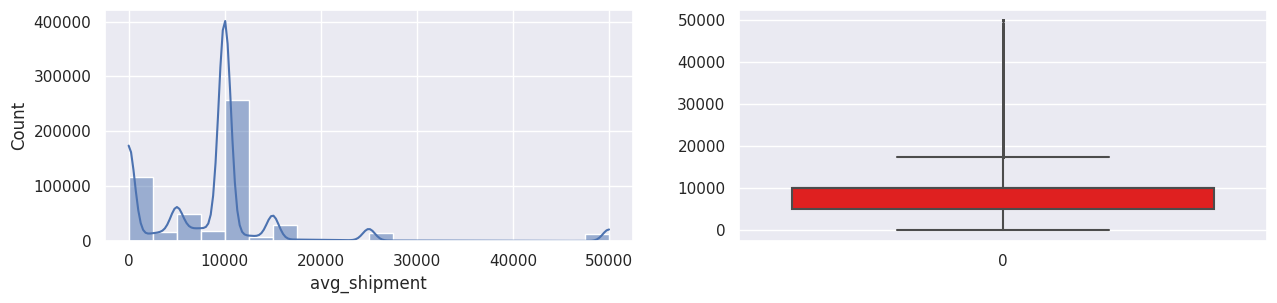

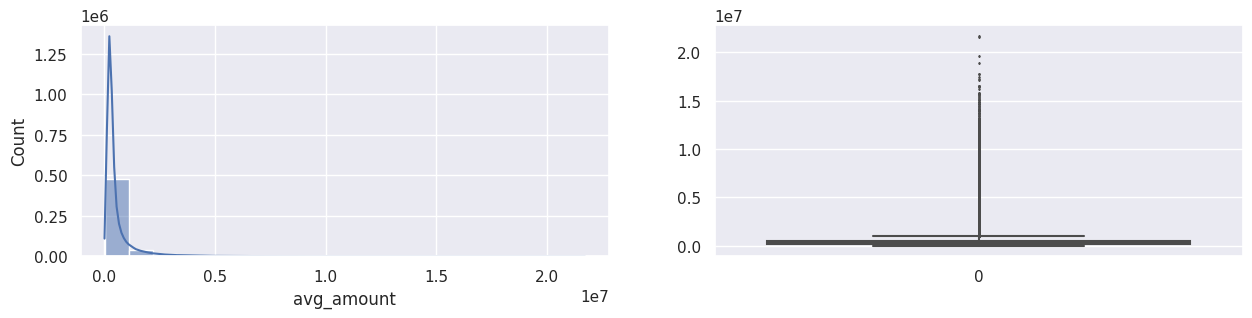

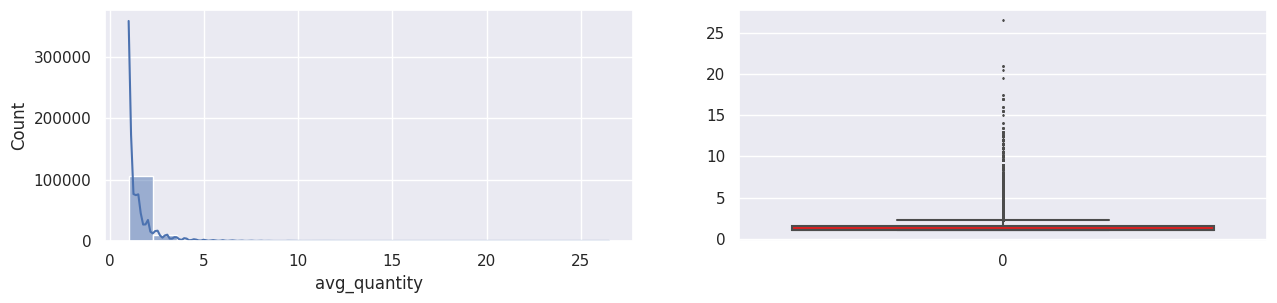

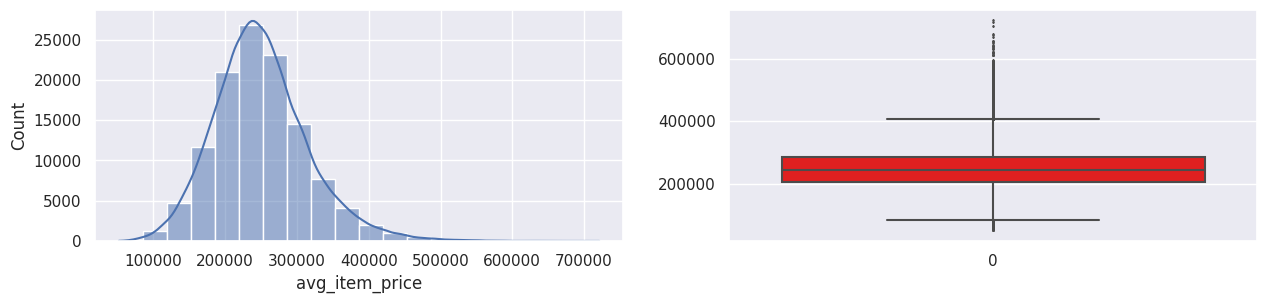

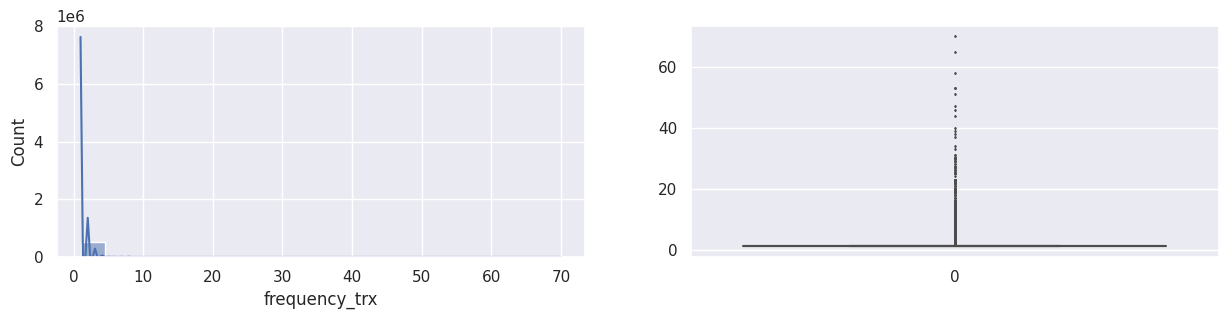

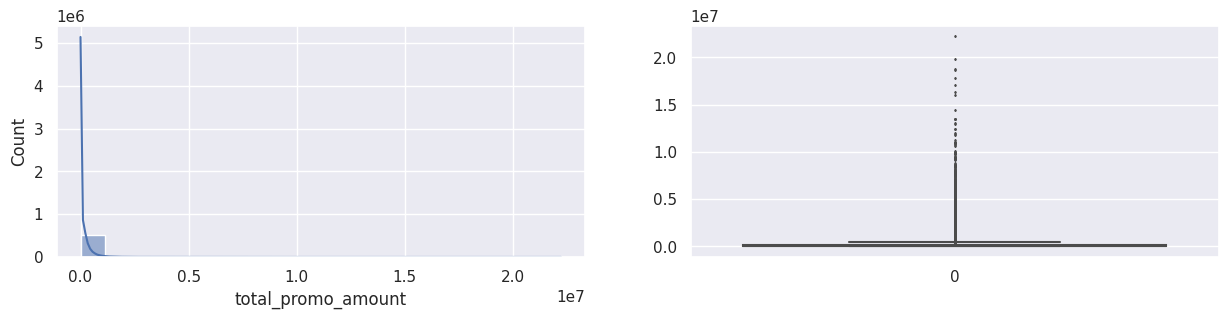

In [ ]:
# Distribusi Numerical Fitur
for i in numerik:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df_agg[i], bins=20, kde=True, ax=axs[0]);
    sns.boxplot(df_agg[i], ax=axs[1], color='red', fliersize=1);

In [ ]:
# Handling Outliers
num_col_outliers = ['avg_shipment', 'avg_amount', 'avg_quantity', 'avg_item_price', 'frequency_trx', 'total_promo_amount']
for feature in num_col_outliers:
    q1 = df_agg[feature].quantile(0.25)
    q3 = df_agg[feature].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df_agg.loc[df_agg[feature]<lower_limit, feature] = lower_limit
    df_agg.loc[df_agg[feature]>upper_limit, feature] = upper_limit

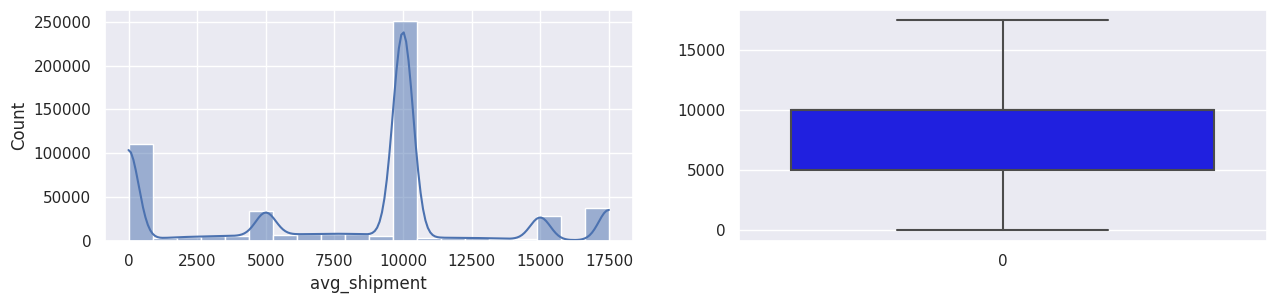

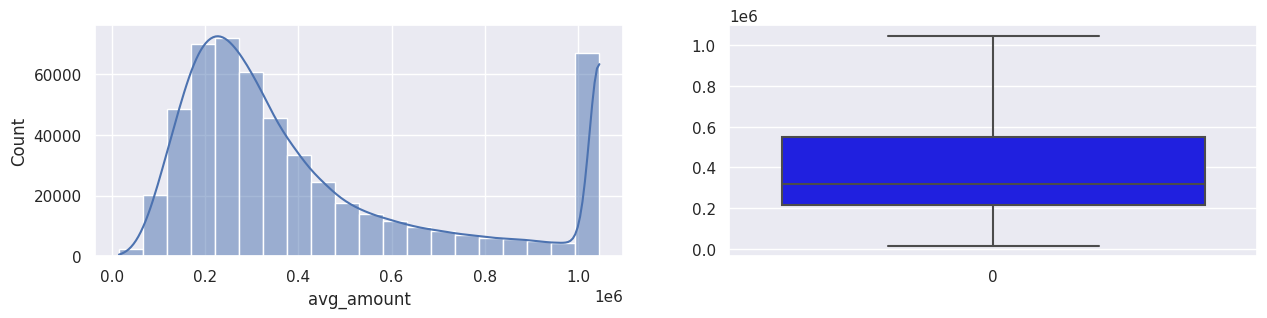

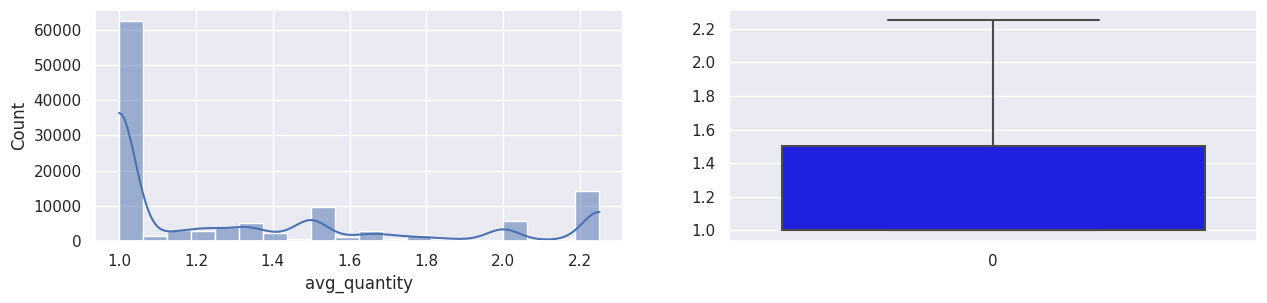

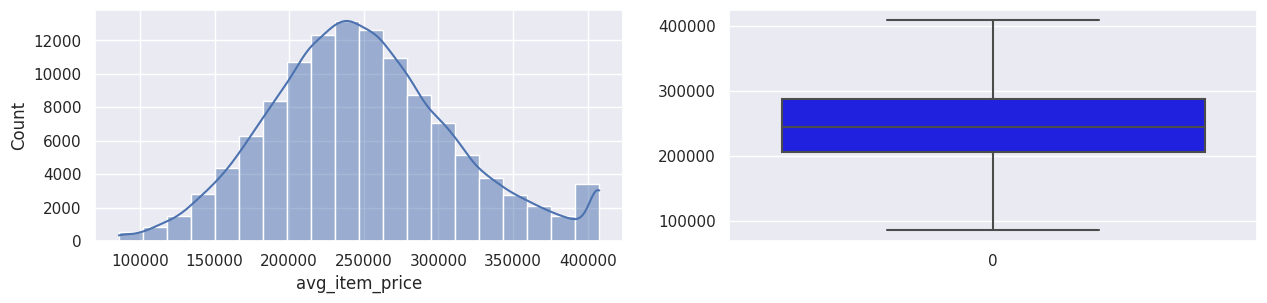

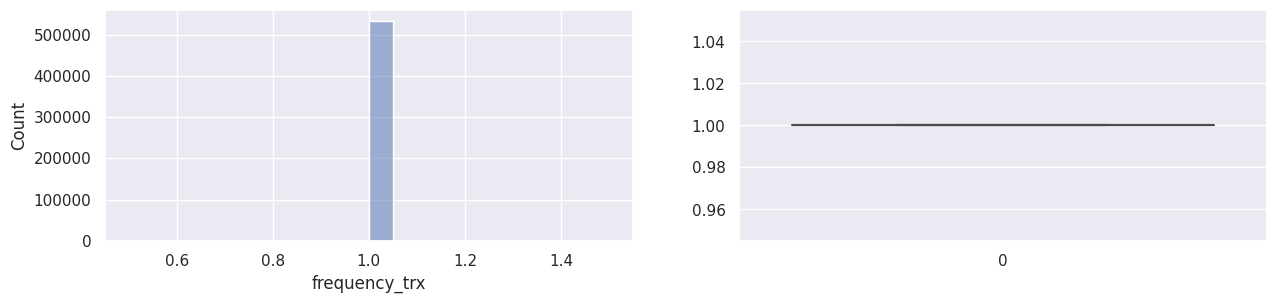

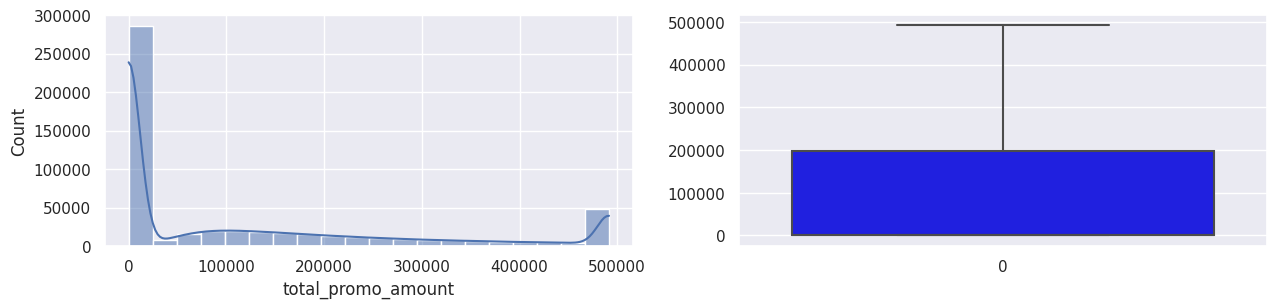

In [ ]:
numerik = ['avg_shipment', 'avg_amount', 'avg_quantity', 'avg_item_price', 'frequency_trx', 'total_promo_amount']

for i in numerik:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df_agg[i], bins=20, kde=True, ax=axs[0]);
    sns.boxplot(df_agg[i], ax=axs[1], color='blue', fliersize=1);

In [ ]:
# #2016

# month1_2016 = df_agg[df_agg['yearmonth'].isin(['2016-05','2016-06'])]
# month2_2016 = df_agg[df_agg['yearmonth'].isin(['2016-07','2016-08'])]
# month3_2016 = df_agg[df_agg['yearmonth'].isin(['2016-09','2016-10'])]
# month4_2016 = df_agg[df_agg['yearmonth'].isin(['2016-11','2016-12'])]

# #2017

# month1_2017 = df_agg[df_agg['yearmonth'].isin(['2017-01','2017-02'])]
# month2_2017 = df_agg[df_agg['yearmonth'].isin(['2017-03','2017-04'])]
# month3_2017 = df_agg[df_agg['yearmonth'].isin(['2017-05','2017-06'])]
# month4_2017 = df_agg[df_agg['yearmonth'].isin(['2017-07','2017-08'])]
# month5_2017 = df_agg[df_agg['yearmonth'].isin(['2017-09','2017-10'])]
# month6_2017 = df_agg[df_agg['yearmonth'].isin(['2017-11','2017-12'])]

# #2018

# month1_2018 = df_agg[df_agg['yearmonth'].isin(['2018-01','2018-02'])]
# month2_2018 = df_agg[df_agg['yearmonth'].isin(['2018-03','2018-04'])]
# month3_2018 = df_agg[df_agg['yearmonth'].isin(['2018-05','2018-06'])]
# month4_2018 = df_agg[df_agg['yearmonth'].isin(['2018-07','2018-08'])]
# month5_2018 = df_agg[df_agg['yearmonth'].isin(['2018-09','2018-10'])]
# month6_2018 = df_agg[df_agg['yearmonth'].isin(['2018-11','2018-12'])]

# # 2019

# month1_2019 = df_agg[df_agg['yearmonth'].isin(['2019-01','2019-02'])]
# month2_2019 = df_agg[df_agg['yearmonth'].isin(['2019-03','2019-04'])]
# month3_2019 = df_agg[df_agg['yearmonth'].isin(['2019-05','2019-06'])]
# month4_2019 = df_agg[df_agg['yearmonth'].isin(['2019-07','2019-08'])]
# month5_2019 = df_agg[df_agg['yearmonth'].isin(['2019-09','2019-10'])]
# month6_2019 = df_agg[df_agg['yearmonth'].isin(['2019-11','2019-12'])]

#2020

month1_2020 = df_agg[df_agg['yearmonth'].isin(['2020-01','2020-02'])]
month2_2020 = df_agg[df_agg['yearmonth'].isin(['2020-03','2020-04'])]
month3_2020 = df_agg[df_agg['yearmonth'].isin(['2020-05','2020-06'])]
month4_2020 = df_agg[df_agg['yearmonth'].isin(['2020-07','2020-08'])]
month5_2020 = df_agg[df_agg['yearmonth'].isin(['2020-09','2020-10'])]
month6_2020 = df_agg[df_agg['yearmonth'].isin(['2020-11','2020-12'])]

#2021

month1_2021 = df_agg[df_agg['yearmonth'].isin(['2021-01','2021-02'])]
month2_2021 = df_agg[df_agg['yearmonth'].isin(['2021-03','2021-04'])]
month3_2021 = df_agg[df_agg['yearmonth'].isin(['2021-05','2021-06'])]
month4_2021 = df_agg[df_agg['yearmonth'].isin(['2021-07','2021-08'])]
month5_2021 = df_agg[df_agg['yearmonth'].isin(['2021-09','2021-10'])]
month6_2021 = df_agg[df_agg['yearmonth'].isin(['2021-11','2021-12'])]

#2022

month1_2022 = df_agg[df_agg['yearmonth'].isin(['2022-01','2022-02'])]
month2_2022 = df_agg[df_agg['yearmonth'].isin(['2022-03','2022-04'])]
month3_2022 = df_agg[df_agg['yearmonth'].isin(['2022-05','2022-06'])]
month4_2022 = df_agg[df_agg['yearmonth'].isin(['2022-07','2022-08'])]

In [ ]:
# # 2016

# #month1
# churn1_16 = month1_2016.merge(month2_2016[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn1_16.fillna(0, inplace = True)
# churn1_16['churn'] = churn1_16.apply(label, axis =1)
# churn2_16 = month2_2016.merge(month3_2016[['customer_id','yearmonth']], on='customer_id', how='outer')

# #month2
# churn2_16 = month2_2016.merge(month3_2016[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn2_16.fillna(0, inplace = True)
# churn2_16['churn'] = churn2_16.apply(label, axis =1)

# #month3
# churn3_16 = month3_2016.merge(month4_2016[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn3_16.fillna(0, inplace = True)
# churn3_16['churn'] = churn3_16.apply(label, axis =1)

# #2017

# #month1
# churn1_17 = month4_2016.merge(month1_2017[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn1_17.fillna(0, inplace = True)
# churn1_17['churn'] = churn1_17.apply(label, axis =1)

# #month2
# churn2_17 = month1_2017.merge(month2_2017[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn2_17.fillna(0, inplace = True)
# churn2_17['churn'] = churn2_17.apply(label, axis =1)

# #month3
# churn3_17 = month2_2017.merge(month3_2017[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn3_17.fillna(0, inplace = True)
# churn3_17['churn'] = churn3_17.apply(label, axis =1)

# #month4
# churn4_17 = month3_2017.merge(month4_2017[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn4_17.fillna(0, inplace = True)
# churn4_17['churn'] = churn4_17.apply(label, axis =1)

# #month5
# churn5_17 = month4_2017.merge(month5_2017[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn5_17.fillna(0, inplace = True)
# churn5_17['churn'] = churn5_17.apply(label, axis =1)

# #month6
# churn6_17 = month5_2017.merge(month6_2017[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn6_17.fillna(0, inplace = True)
# churn6_17['churn'] = churn6_17.apply(label, axis =1)

# # 2018

# #month1
# churn1_18 = month6_2017.merge(month1_2018[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn1_18.fillna(0, inplace = True)
# churn1_18['churn'] = churn1_18.apply(label, axis =1)

# #month2
# churn2_18 = month1_2018.merge(month2_2018[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn2_18.fillna(0, inplace = True)
# churn2_18['churn'] = churn2_18.apply(label, axis =1)

# #month3
# churn3_18 = month2_2018.merge(month3_2018[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn3_18.fillna(0, inplace = True)
# churn3_18['churn'] = churn3_18.apply(label, axis =1)

# #month4
# churn4_18 = month3_2018.merge(month4_2018[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn4_18.fillna(0, inplace = True)
# churn4_18['churn'] = churn4_18.apply(label, axis =1)

# #month5
# churn5_18 = month4_2018.merge(month5_2018[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn5_18.fillna(0, inplace = True)
# churn5_18['churn'] = churn5_18.apply(label, axis =1)

# #month6
# churn6_18 = month5_2018.merge(month6_2018[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn6_18.fillna(0, inplace = True)
# churn6_18['churn'] = churn6_18.apply(label, axis =1)

# # 2019

# #month1
# churn1_19 = month6_2018.merge(month1_2019[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn1_19.fillna(0, inplace = True)
# churn1_19['churn'] = churn1_19.apply(label, axis =1)

# #month2
# churn2_19 = month1_2019.merge(month2_2019[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn2_19.fillna(0, inplace = True)
# churn2_19['churn'] = churn2_19.apply(label, axis =1)

# #month3
# churn3_19 = month2_2019.merge(month3_2019[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn3_19.fillna(0, inplace = True)
# churn3_19['churn'] = churn3_19.apply(label, axis =1)

# #month4
# churn4_19 = month3_2019.merge(month4_2019[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn4_19.fillna(0, inplace = True)
# churn4_19['churn'] = churn4_19.apply(label, axis =1)

# #month5
# churn5_19 = month4_2019.merge(month5_2019[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn5_19.fillna(0, inplace = True)
# churn5_19['churn'] = churn5_19.apply(label, axis =1)

# #month6
# churn6_19 = month5_2019.merge(month6_2019[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn6_19.fillna(0, inplace = True)
# churn6_19['churn'] = churn6_19.apply(label, axis =1)

# 2020

#month1
# churn1_20 = month6_2019.merge(month1_2020[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn1_20.fillna(0, inplace = True)
# churn1_20['churn'] = churn1_20.apply(label, axis =1)

#month2
# churn2_20 = month1_2020.merge(month2_2020[['customer_id','yearmonth']], on='customer_id', how='outer')
# churn2_20.fillna(0, inplace = True)
# churn2_20['churn'] = churn2_20.apply(label, axis =1)

#month3
churn3_20 = month2_2020.merge(month3_2020[['customer_id','yearmonth']], on='customer_id', how='outer')
churn3_20.fillna(0, inplace = True)
churn3_20['churn'] = churn3_20.apply(label, axis =1)

#month4
churn4_20 = month3_2020.merge(month4_2020[['customer_id','yearmonth']], on='customer_id', how='outer')
churn4_20.fillna(0, inplace = True)
churn4_20['churn'] = churn4_20.apply(label, axis =1)

#month5
churn5_20 = month4_2020.merge(month5_2020[['customer_id','yearmonth']], on='customer_id', how='outer')
churn5_20.fillna(0, inplace = True)
churn5_20['churn'] = churn5_20.apply(label, axis =1)

#month6
churn6_20 = month5_2020.merge(month6_2020[['customer_id','yearmonth']], on='customer_id', how='outer')
churn6_20.fillna(0, inplace = True)
churn6_20['churn'] = churn6_20.apply(label, axis =1)

# 2021

#month1
churn1_21 = month6_2020.merge(month1_2021[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1_21.fillna(0, inplace = True)
churn1_21['churn'] = churn1_21.apply(label, axis =1)

#month2
churn2_21 = month1_2021.merge(month2_2021[['customer_id','yearmonth']], on='customer_id', how='outer')
churn2_21.fillna(0, inplace = True)
churn2_21['churn'] = churn2_21.apply(label, axis =1)

#month3
churn3_21 = month2_2021.merge(month3_2021[['customer_id','yearmonth']], on='customer_id', how='outer')
churn3_21.fillna(0, inplace = True)
churn3_21['churn'] = churn3_21.apply(label, axis =1)

#month4
churn4_21 = month3_2021.merge(month4_2021[['customer_id','yearmonth']], on='customer_id', how='outer')
churn4_21.fillna(0, inplace = True)
churn4_21['churn'] = churn4_21.apply(label, axis =1)

#month5
churn5_21 = month4_2021.merge(month5_2021[['customer_id','yearmonth']], on='customer_id', how='outer')
churn5_21.fillna(0, inplace = True)
churn5_21['churn'] = churn5_21.apply(label, axis =1)

#month6
churn6_21 = month5_2021.merge(month6_2021[['customer_id','yearmonth']], on='customer_id', how='outer')
churn6_21.fillna(0, inplace = True)
churn6_21['churn'] = churn6_21.apply(label, axis =1)

# 2022

#month1
churn1_22 = month6_2021.merge(month1_2022[['customer_id','yearmonth']], on='customer_id', how='outer')
churn1_22.fillna(0, inplace = True)
churn1_22['churn'] = churn1_22.apply(label, axis =1)

#month2
churn2_22 = month1_2022.merge(month2_2022[['customer_id','yearmonth']], on='customer_id', how='outer')
churn2_22.fillna(0, inplace = True)
churn2_22['churn'] = churn2_22.apply(label, axis =1)

#month3
churn3_22 = month2_2022.merge(month3_2022[['customer_id','yearmonth']], on='customer_id', how='outer')
churn3_22.fillna(0, inplace = True)
churn3_22['churn'] = churn3_22.apply(label, axis =1)

#month4
churn4_22 = month3_2022.merge(month4_2022[['customer_id','yearmonth']], on='customer_id', how='outer')
churn4_22.fillna(0, inplace = True)
churn4_22['churn'] = churn4_22.apply(label, axis =1)

In [ ]:
# dataset2016_2month = pd.concat([churn1_16,churn2_16,churn3_16])
# dataset2017_2month = pd.concat([churn1_17,churn2_17,churn3_17,churn4_17,churn5_17,churn6_17])
# dataset2018_2month = pd.concat([churn1_18,churn2_18,churn3_18,churn4_18,churn5_18,churn6_18])
# dataset2019_2month = pd.concat([churn1_19,churn2_19,churn3_19,churn4_19,churn5_19,churn6_19])
# dataset2020_2month = pd.concat([churn1_20,churn2_20,churn3_20,churn4_20,churn5_20,churn6_20])
dataset2020_2month = pd.concat([churn3_20,churn4_20,churn5_20,churn6_20])
dataset2021_2month = pd.concat([churn1_21,churn2_21,churn3_21,churn4_21,churn5_21,churn6_21])
dataset2022_2month = pd.concat([churn1_22,churn2_22,churn3_22,churn4_22])

In [ ]:
df_final_2month = pd.concat([dataset2020_2month,dataset2021_2month,dataset2022_2month])

In [ ]:
df_final_2month.head()

,yearmonth_x,customer_id,total_shipment,min_shipment,max_shipment,avg_shipment,total_amount,min_amount,max_amount,avg_amount,...,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,avg_web,avg_mobile,yearmonth_y,churn
0,2020-03,3,60000.0,5000.0,5000.0,5000.0,2509200.0,209100.0,209100.0,209100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2020-05,0
1,2020-03,3,60000.0,5000.0,5000.0,5000.0,2509200.0,209100.0,209100.0,209100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2020-06,0
2,2020-04,3,360000.0,10000.0,10000.0,10000.0,9847836.0,273551.0,273551.0,273551.0,...,2.0,0.0,0.0,1.0,3.0,1.0,0.0,12.0,2020-05,0
3,2020-04,3,360000.0,10000.0,10000.0,10000.0,9847836.0,273551.0,273551.0,273551.0,...,2.0,0.0,0.0,1.0,3.0,1.0,0.0,12.0,2020-06,0
4,2020-03,40,510000.0,10000.0,10000.0,10000.0,7272396.0,142596.0,142596.0,142596.0,...,3.0,2.0,1.0,4.0,1.0,1.0,0.0,17.0,0,1


In [ ]:
df_final_2month = df_final_2month.copy()

In [ ]:
# # Mengonversi kolom 'yearmonth_x' menjadi tipe data bytes
# df_final_2month['yearmonth_x'] = df_final_2month['yearmonth_x'].astype('bytes')

# # Mengonversi kolom 'yearmonth_y' menjadi tipe data bytes
# df_final_2month['yearmonth_y'] = df_final_2month['yearmonth_y'].astype('bytes')

# # Menyimpan DataFrame baru
# df_final_2month.to_parquet('df_final_2month.parquet', index=False)

#### Per-3 bulan (quarter)

In [ ]:
df_feature['quarter'] = df_feature['yearmonth'].astype('period[Q]')

In [ ]:
# data aggregate

df_agg = df_feature.groupby(['quarter','customer_id']).agg(
                            total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
                            min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
                            max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
                            avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),

                            total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
                            min_amount = pd.NamedAgg(column = 'total_amount', aggfunc=min),
                            max_amount = pd.NamedAgg(column = 'total_amount', aggfunc=max),
                            avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),

                            total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
                            min_quantity = pd.NamedAgg(column = 'quantity', aggfunc=min),
                            max_quantity = pd.NamedAgg(column = 'quantity', aggfunc=max),
                            avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),

                            min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
                            max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
                            avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),

                            frequency_trx = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
                            total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),
                            first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
                            last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
                            total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
                            total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),

                            avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
                            avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
                            avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
                            item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
                            avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
                            avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
                            avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
                            avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),

                            avg_web = pd.NamedAgg(column = 'web', aggfunc='mean'),
                            avg_mobile = pd.NamedAgg(column = 'mobile', aggfunc='mean')

                            ).reset_index()

In [ ]:
# 2016
qtr3_16 = df_agg[df_agg['quarter'] == '2016Q3']
qtr4_16 = df_agg[df_agg['quarter'] == '2016Q4']

# 2017
qtr1_17 = df_agg[df_agg['quarter'] == '2017Q1']
qtr2_17 = df_agg[df_agg['quarter'] == '2017Q2']
qtr3_17 = df_agg[df_agg['quarter'] == '2017Q3']
qtr4_17 = df_agg[df_agg['quarter'] == '2017Q4']

#2018
qtr1_18 = df_agg[df_agg['quarter'] == '2018Q1']
qtr2_18 = df_agg[df_agg['quarter'] == '2018Q2']
qtr3_18 = df_agg[df_agg['quarter'] == '2018Q3']
qtr4_18 = df_agg[df_agg['quarter'] == '2018Q4']

# 2019
qtr1_19 = df_agg[df_agg['quarter'] == '2019Q1']
qtr2_19 = df_agg[df_agg['quarter'] == '2019Q2']
qtr3_19 = df_agg[df_agg['quarter'] == '2019Q3']
qtr4_19 = df_agg[df_agg['quarter'] == '2019Q4']

# 2020
qtr1_20 = df_agg[df_agg['quarter'] == '2020Q1']
qtr2_20 = df_agg[df_agg['quarter'] == '2020Q2']
qtr3_20 = df_agg[df_agg['quarter'] == '2020Q3']
qtr4_20 = df_agg[df_agg['quarter'] == '2020Q4']

# 2021
qtr1_21 = df_agg[df_agg['quarter'] == '2021Q1']
qtr2_21 = df_agg[df_agg['quarter'] == '2021Q2']
qtr3_21 = df_agg[df_agg['quarter'] == '2021Q3']
qtr4_21 = df_agg[df_agg['quarter'] == '2021Q4']

# 2022
qtr1_22 = df_agg[df_agg['quarter'] == '2022Q1']
qtr2_22 = df_agg[df_agg['quarter'] == '2022Q2']
qtr3_22 = df_agg[df_agg['quarter'] == '2022Q3']

In [ ]:
# 2016

# quarter3_2016
qchurn1_16 = qtr3_16.merge(qtr4_16[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn1_16.fillna(0, inplace = True)

# get churn label
qchurn1_16['churn'] = qchurn1_16.apply(qlabel, axis = 1)

# 2017

# quarter1_2017
qchurn1_17 = qtr4_16.merge(qtr1_17[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn1_17.fillna(0, inplace = True)
qchurn1_17['churn'] = qchurn1_17.apply(qlabel, axis = 1)     # get churn label

# quarter2_2017
qchurn2_17 = qtr1_17.merge(qtr2_17[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn2_17.fillna(0, inplace = True)
qchurn2_17['churn'] = qchurn2_17.apply(qlabel, axis = 1)     # get churn label

# quarter3_2017
qchurn3_17 = qtr2_17.merge(qtr3_17[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn3_17.fillna(0, inplace = True)
qchurn3_17['churn'] = qchurn3_17.apply(qlabel, axis = 1)     # get churn label

# quarter4_2017
qchurn4_17 = qtr3_17.merge(qtr4_17[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn4_17.fillna(0, inplace = True)
qchurn4_17['churn'] = qchurn4_17.apply(qlabel, axis = 1)     # get churn label

# 2018

# quarter1_2018
qchurn1_18 = qtr4_17.merge(qtr1_18[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn1_18.fillna(0, inplace = True)
qchurn1_18['churn'] = qchurn1_18.apply(qlabel, axis = 1)     # get churn label

# quarter2_2018
qchurn2_18 = qtr1_18.merge(qtr2_18[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn2_18.fillna(0, inplace = True)
qchurn2_18['churn'] = qchurn2_18.apply(qlabel, axis = 1)     # get churn label

# quarter3_2018
qchurn3_18 = qtr2_18.merge(qtr3_18[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn3_18.fillna(0, inplace = True)
qchurn3_18['churn'] = qchurn3_18.apply(qlabel, axis = 1)     # get churn label

# quarter4_2018
qchurn4_18 = qtr3_18.merge(qtr4_18[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn4_18.fillna(0, inplace = True)
qchurn4_18['churn'] = qchurn4_18.apply(qlabel, axis = 1)     # get churn label

# 2019

# quarter1_2019
qchurn1_19 = qtr4_18.merge(qtr1_19[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn1_19.fillna(0, inplace = True)
qchurn1_19['churn'] = qchurn1_19.apply(qlabel, axis = 1)     # get churn qlabel

# quarter2_2019
qchurn2_19 = qtr1_19.merge(qtr2_19[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn2_19.fillna(0, inplace = True)
qchurn2_19['churn'] = qchurn2_19.apply(qlabel, axis = 1)     # get churn qlabel

# quarter3_2019
qchurn3_19 = qtr2_19.merge(qtr3_19[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn3_19.fillna(0, inplace = True)
qchurn3_19['churn'] = qchurn3_19.apply(qlabel, axis = 1)     # get churn qlabel

# quarter4_2019
qchurn4_19 = qtr3_19.merge(qtr4_19[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn4_19.fillna(0, inplace = True)
qchurn4_19['churn'] = qchurn4_19.apply(qlabel, axis = 1)     # get churn qlabel

# 2020

# quarter1_2020
qchurn1_20 = qtr4_19.merge(qtr1_20[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn1_20.fillna(0, inplace = True)
qchurn1_20['churn'] = qchurn1_20.apply(qlabel, axis = 1)     # get churn qlabel

# quarter2_2020
qchurn2_20 = qtr1_20.merge(qtr2_20[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn2_20.fillna(0, inplace = True)
qchurn2_20['churn'] = qchurn2_20.apply(qlabel, axis = 1)     # get churn qlabel

# quarter3_2020
qchurn3_20 = qtr2_20.merge(qtr3_20[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn3_20.fillna(0, inplace = True)
qchurn3_20['churn'] = qchurn3_20.apply(qlabel, axis = 1)     # get churn qlabel

# quarter4_2020
qchurn4_20 = qtr3_20.merge(qtr4_20[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn4_20.fillna(0, inplace = True)
qchurn4_20['churn'] = qchurn4_20.apply(qlabel, axis = 1)     # get churn label

# 2021

# quarter1_2021
qchurn1_21 = qtr4_20.merge(qtr1_21[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn1_21.fillna(0, inplace = True)
qchurn1_21['churn'] = qchurn1_21.apply(qlabel, axis = 1)     # get churn label

# quarter2_2021
qchurn2_21 = qtr1_21.merge(qtr2_21[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn2_21.fillna(0, inplace = True)
qchurn2_21['churn'] = qchurn2_21.apply(qlabel, axis = 1)     # get churn label

# quarter3_2021
qchurn3_21 = qtr2_21.merge(qtr3_21[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn3_21.fillna(0, inplace = True)
qchurn3_21['churn'] = qchurn3_21.apply(qlabel, axis = 1)     # get churn label

# quarter4_2021
qchurn4_21 = qtr3_21.merge(qtr4_21[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn4_21.fillna(0, inplace = True)
qchurn4_21['churn'] = qchurn4_21.apply(qlabel, axis = 1)     # get churn label

# 2022

# quarter1_2022
qchurn1_22 = qtr4_21.merge(qtr1_22[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn1_22.fillna(0, inplace = True)
qchurn1_22['churn'] = qchurn1_22.apply(qlabel, axis = 1)     # get churn label

# quarter2_2022
qchurn2_22 = qtr1_22.merge(qtr2_22[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn2_22.fillna(0, inplace = True)
qchurn2_22['churn'] = qchurn2_22.apply(qlabel, axis = 1)     # get churn label

# quarter3_2022
qchurn3_22 = qtr2_22.merge(qtr3_22[['customer_id', 'quarter']], on='customer_id', how='outer')
qchurn3_22.fillna(0, inplace = True)
qchurn3_22['churn'] = qchurn3_22.apply(qlabel, axis = 1)     # get churn label

In [ ]:
# Menggabungkan data per tahun

dataset2016_quarter = qchurn1_16
dataset2017_quarter = pd.concat([qchurn1_17,qchurn2_17,qchurn3_17,qchurn4_17])
dataset2018_quarter = pd.concat([qchurn1_18,qchurn2_18,qchurn3_18,qchurn4_18])
dataset2019_quarter = pd.concat([qchurn1_19,qchurn2_19,qchurn3_19,qchurn4_19])
dataset2020_quarter = pd.concat([qchurn1_20,qchurn2_20,qchurn3_20,qchurn4_20])
dataset2021_quarter = pd.concat([qchurn1_21,qchurn2_21,qchurn3_21,qchurn4_21])
dataset2022_quarter = pd.concat([qchurn1_22,qchurn2_22,qchurn3_22])

In [ ]:
# MEnggabungkan semua data

df_final_quarter = pd.concat([dataset2016_quarter,dataset2017_quarter,dataset2018_quarter,dataset2019_quarter,dataset2020_quarter,dataset2021_quarter,dataset2022_quarter])

In [ ]:
df_final_quarter.head()

,quarter_x,customer_id,total_shipment,min_shipment,max_shipment,avg_shipment,total_amount,min_amount,max_amount,avg_amount,...,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,avg_web,avg_mobile,quarter_y,churn
0,2016Q3,100,0.0,0.0,0.0,0.0,1860750.0,62025.0,62025.0,62025.0,...,1.0,1.0,0.0,0.0,3.0,1.0,0.0,10.0,0,1
1,2016Q3,215,210000.0,10000.0,10000.0,10000.0,4710111.0,224291.0,224291.0,224291.0,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,7.0,2016Q4,0
2,2016Q3,221,0.0,0.0,0.0,0.0,8413848.0,467436.0,467436.0,467436.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0,1
3,2016Q3,300,0.0,0.0,0.0,0.0,4138560.0,172440.0,172440.0,172440.0,...,1.0,0.0,0.0,1.0,2.0,0.0,0.0,8.0,0,1
4,2016Q3,665,0.0,0.0,0.0,0.0,4227960.0,176165.0,176165.0,176165.0,...,1.0,1.0,0.0,0.0,2.0,1.0,0.0,8.0,0,1


In [ ]:
df_final_quarter = df_final_quarter.copy()

In [ ]:
# # Mengonversi kolom 'quarter_x' menjadi tipe data bytes
# df_final_quarter['quarter_x'] = df_final_quarter['quarter_x'].astype('bytes')

# # Mengonversi kolom 'quarter_y' menjadi tipe data bytes
# df_final_quarter['quarter_y'] = df_final_quarter['quarter_y'].astype('bytes')

# # Menyimpan DataFrame baru yang sudah tidak ada duplikasi
# df_final_quarter.to_parquet('df_final_quarter.parquet', index=False)

#### Per-6 bulan (semester)

In [ ]:
df_feature['semester']  = df_feature['created_at'].dt.year.astype(str) + 'S'+ np.where(df_feature['created_at'].dt.quarter.gt(2),2,1).astype(str)

In [ ]:
# data aggregate

df_agg = df_feature.groupby(['semester','customer_id']).agg(
                            total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
                            min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
                            max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
                            avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),

                            total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
                            min_amount = pd.NamedAgg(column = 'total_amount', aggfunc=min),
                            max_amount = pd.NamedAgg(column = 'total_amount', aggfunc=max),
                            avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),

                            total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
                            min_quantity = pd.NamedAgg(column = 'quantity', aggfunc=min),
                            max_quantity = pd.NamedAgg(column = 'quantity', aggfunc=max),
                            avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),

                            min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
                            max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
                            avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),

                            frequency_trx = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
                            total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),
                            first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
                            last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
                            total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
                            total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),

                            avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
                            avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
                            avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
                            item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
                            avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
                            avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
                            avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
                            avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),

                            avg_web = pd.NamedAgg(column = 'web', aggfunc='mean'),
                            avg_mobile = pd.NamedAgg(column = 'mobile', aggfunc='mean')

                            ).reset_index()

In [ ]:
# Filter period

# 2016
smt1_16 = df_agg[df_agg['semester'] == '2016S1']
smt2_16 = df_agg[df_agg['semester'] == '2016S2']

# 2017
smt1_17 = df_agg[df_agg['semester'] == '2017S1']
smt2_17 = df_agg[df_agg['semester'] == '2017S2']

# 2018
smt1_18 = df_agg[df_agg['semester'] == '2018S1']
smt2_18 = df_agg[df_agg['semester'] == '2018S2']

# 2019
smt1_19 = df_agg[df_agg['semester'] == '2019S1']
smt2_19 = df_agg[df_agg['semester'] == '2019S2']

# 2020
smt1_20 = df_agg[df_agg['semester'] == '2020S1']
smt2_20 = df_agg[df_agg['semester'] == '2020S2']

# 2021
smt1_21 = df_agg[df_agg['semester'] == '2021S1']
smt2_21 = df_agg[df_agg['semester'] == '2021S2']

# 2022
smt1_22 = df_agg[df_agg['semester'] == '2022S1']
smt2_22 = df_agg[df_agg['semester'] == '2022S2']

In [ ]:
# 2016

# semester2_2016
schurn1_16 = smt1_16.merge(smt2_16[['customer_id', 'semester']], on='customer_id', how='outer')
schurn1_16.fillna(0, inplace = True)

# get churn slabel
schurn1_16['churn'] = schurn1_16.apply(slabel, axis = 1)

# 2017

# semester1_2017
schurn1_17 = smt2_16.merge(smt1_17[['customer_id', 'semester']], on='customer_id', how='outer')
schurn1_17.fillna(0, inplace = True)
schurn1_17['churn'] = schurn1_17.apply(slabel, axis = 1)

# semester2_2017
schurn2_17 = smt1_17.merge(smt2_17[['customer_id', 'semester']], on='customer_id', how='outer')
schurn2_17.fillna(0, inplace = True)
schurn2_17['churn'] = schurn2_17.apply(slabel, axis = 1)

# 2018

# semester1_2018
schurn1_18 = smt2_17.merge(smt1_18[['customer_id', 'semester']], on='customer_id', how='outer')
schurn1_18.fillna(0, inplace = True)
schurn1_18['churn'] = schurn1_18.apply(slabel, axis = 1)

# semester2_2018
schurn2_18 = smt1_18.merge(smt2_18[['customer_id', 'semester']], on='customer_id', how='outer')
schurn2_18.fillna(0, inplace = True)
schurn2_18['churn'] = schurn2_18.apply(slabel, axis = 1)

# 2019

# semester1_2019
schurn1_19 = smt2_18.merge(smt1_19[['customer_id', 'semester']], on='customer_id', how='outer')
schurn1_19.fillna(0, inplace = True)
schurn1_19['churn'] = schurn1_19.apply(slabel, axis = 1)

# semester2_2019
schurn2_19 = smt1_19.merge(smt2_19[['customer_id', 'semester']], on='customer_id', how='outer')
schurn2_19.fillna(0, inplace = True)
schurn2_19['churn'] = schurn2_19.apply(slabel, axis = 1)

# 2020

# semester1_2020
schurn1_20 = smt2_19.merge(smt1_20[['customer_id', 'semester']], on='customer_id', how='outer')
schurn1_20.fillna(0, inplace = True)
schurn1_20['churn'] = schurn1_20.apply(slabel, axis = 1)

# semester2_2020
schurn2_20 = smt1_20.merge(smt2_20[['customer_id', 'semester']], on='customer_id', how='outer')
schurn2_20.fillna(0, inplace = True)
schurn2_20['churn'] = schurn2_20.apply(slabel, axis = 1)

# 2021

# semester1_2021
schurn1_21 = smt2_20.merge(smt1_21[['customer_id', 'semester']], on='customer_id', how='outer')
schurn1_21.fillna(0, inplace = True)
schurn1_21['churn'] = schurn1_21.apply(slabel, axis = 1)

# semester2_2021
schurn2_21 = smt1_21.merge(smt2_21[['customer_id', 'semester']], on='customer_id', how='outer')
schurn2_21.fillna(0, inplace = True)
schurn2_21['churn'] = schurn2_21.apply(slabel, axis = 1)

# 2022

# semester1_2022
schurn1_22 = smt2_21.merge(smt1_22[['customer_id', 'semester']], on='customer_id', how='outer')
schurn1_22.fillna(0, inplace = True)
schurn1_22['churn'] = schurn1_22.apply(slabel, axis = 1)

# semester2_2022
schurn2_22 = smt1_22.merge(smt2_22[['customer_id', 'semester']], on='customer_id', how='outer')
schurn2_22.fillna(0, inplace = True)
schurn2_22['churn'] = schurn2_22.apply(slabel, axis = 1)

In [ ]:
# Menggabungkan data (pertahun)

dataset2016_semester = schurn1_16
dataset2017_semester = pd.concat([schurn1_17,schurn2_17]).reset_index()
dataset2017_semester = dataset2017_semester.drop(['index'], axis=1)
dataset2018_semester = pd.concat([schurn1_18,schurn2_18]).reset_index()
dataset2018_semester = dataset2018_semester.drop(['index'], axis=1)
dataset2019_semester = pd.concat([schurn1_19,schurn2_19]).reset_index()
dataset2019_semester = dataset2019_semester.drop(['index'], axis=1)
dataset2020_semester = pd.concat([schurn1_20,schurn2_20]).reset_index()
dataset2020_semester = dataset2020_semester.drop(['index'], axis=1)
dataset2021_semester = pd.concat([schurn1_21,schurn2_21]).reset_index()
dataset2021_semester = dataset2021_semester.drop(['index'], axis=1)
dataset2022_semester = pd.concat([schurn1_22,schurn2_22]).reset_index()
dataset2022_semester = dataset2022_semester.drop(['index'], axis=1)

In [ ]:
# Menggabungkan semua data

df_final_semester = pd.concat([dataset2016_semester,dataset2017_semester,dataset2018_semester,dataset2019_semester,dataset2020_semester,dataset2021_semester,dataset2022_semester])

In [ ]:
df_final_semester = df_final_semester.copy()

In [ ]:
df_final_semester.head(2)

,semester_x,customer_id,total_shipment,min_shipment,max_shipment,avg_shipment,total_amount,min_amount,max_amount,avg_amount,...,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,avg_web,avg_mobile,semester_y,churn
0,2016S1,74089,420000.0,10000.0,10000.0,10000.0,26913390.0,640795.0,640795.0,640795.0,...,3.0,2.0,0.0,0.0,1.0,0.0,0.0,14.0,0,1
1,0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016S2,1


In [ ]:
# # Mengonversi kolom 'yearmonth_x' menjadi tipe data bytes
# df_final_semester['semester_x'] = df_final_semester['semester_x'].astype('bytes')

# # Mengonversi kolom 'yearmonth_y' menjadi tipe data bytes
# df_final_semester['semester_y'] = df_final_semester['semester_y'].astype('bytes')

# # Menyimpan DataFrame baru yang sudah tidak ada duplikasi
# df_final_semester.to_parquet('df_final_semester.parquet', index=False)

In [ ]:
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,umur,subscription_duration,average_spending,spending_category
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,27,4.353425,NaN,None
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,30,6.367123,NaN,None
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,34,3.260274,701269.422886,Platinum
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,32,2.147945,NaN,None
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,23,2.627397,115702.000000,Silver


In [ ]:
# Menyimpan DataFrame baru yang sudah tidak ada duplikasi
df_customer.to_parquet('df_customer.parquet', index=False)

# Per-12 bulan (tahun)

In [ ]:
df_feature_copy = df_feature.copy()

In [ ]:
df_feature_copy['tahunan'] = df_feature_copy['created_at'].dt.strftime('%Y-%m')

In [ ]:
# data aggregate

df_agg = df_feature_copy.groupby(['tahunan','customer_id']).agg(
                            total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
                            min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
                            max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
                            avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),

                            total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
                            min_amount = pd.NamedAgg(column = 'total_amount', aggfunc=min),
                            max_amount = pd.NamedAgg(column = 'total_amount', aggfunc=max),
                            avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),

                            total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
                            min_quantity = pd.NamedAgg(column = 'quantity', aggfunc=min),
                            max_quantity = pd.NamedAgg(column = 'quantity', aggfunc=max),
                            avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),

                            min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
                            max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
                            avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),

                            frequency_trx = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
                            total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),
                            first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
                            last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
                            total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
                            total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),

                            avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
                            avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
                            avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
                            item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
                            avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
                            avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
                            avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
                            avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),

                            avg_web = pd.NamedAgg(column = 'web', aggfunc='mean'),
                            avg_mobile = pd.NamedAgg(column = 'mobile', aggfunc='mean')

                            ).reset_index()

### Data Cleaning

#### Dataframe Final 1 bulan

In [ ]:
df_final_monthly = df_final_monthly.copy()

In [ ]:
df_final_monthly.info()

In [ ]:
df_final_monthly.rename(columns={'yearmonth_x': 'yearmonth'}, inplace=True)

In [ ]:
df_final_monthly.drop(['yearmonth_y'], axis=1, inplace=True)

In [ ]:
df_final_monthly.drop(['last_transaction', 'total_shipment', 'min_shipment', 'min_quantity', 'max_quantity', 'last_transaction', 'avg_web','avg_mobile', 'total_amount', 'total_promo_code', 'max_shipment', 'min_amount', 'max_amount', 'min_item_price', 'max_item_price', 'first_transaction'], axis=1, inplace=True)

In [ ]:
df_final_monthly.info()

In [ ]:
# Mengecek null value
df_final_monthly.isna().sum()

In [ ]:
# df_final_monthly.drop(df_final_monthly[df_final_monthly['yearmonth'] == '1970-01-01'].index, inplace=True)

In [ ]:
# Mengubah tipe data
df_final_monthly['yearmonth'] = df_final_monthly['yearmonth'].astype('datetime64')

In [ ]:
df_final_monthly.shape

#### Dataframe Final 2 bulan

In [ ]:
df_final_2month = df_final_2month.copy()

In [ ]:
df_final_2month.info()

In [ ]:
df_final_2month.rename(columns={'yearmonth_x': 'yearmonth'}, inplace=True)

In [ ]:
df_final_2month.drop(['yearmonth_y'], axis=1, inplace=True)

In [ ]:
df_final_2month.drop(['last_transaction', 'total_shipment', 'min_shipment', 'min_quantity', 'max_quantity', 'last_transaction', 'avg_web','avg_mobile', 'total_amount', 'total_promo_code', 'max_shipment', 'min_amount', 'max_amount', 'min_item_price', 'max_item_price', 'first_transaction'], axis=1, inplace=True)

In [ ]:
df_final_2month.info()

In [ ]:
# Checking null value

df_final_2month.isna().sum()

In [ ]:
df_final_2month.drop(df_final_2month[df_final_2month['yearmonth'] == '1970-01-01'].index, inplace=True)

In [ ]:
df_final_2month['yearmonth'] = df_final_2month['yearmonth'].astype('datetime64')

In [ ]:
df_final_2month.shape

In [ ]:
# Split Data

# df_final1 = df_feature.iloc[:100000,:]
# df_final2 = df_feature.iloc[100000:200000,:]
# df_final3 = df_feature.iloc[200000:300000,:]
# df_final4 = df_feature.iloc[300000:400000,:]
# df_final5 = df_feature.iloc[400000:500000,:]
# df_final6 = df_feature.iloc[500000:500000,:]
# df_final7 = df_feature.iloc[600000:700000,:]
# df_final8 = df_feature.iloc[700000:800000,:]
# df_final9 = df_feature.iloc[800000:900000,:]
# df_final10 = df_feature.iloc[900000:,:]

In [ ]:
df_final_2month.head()

In [ ]:
# Menggabungkan data_final dan df_customer berdasarkan kolom 'customer_id'
df_master_2month = df_customer.merge(df_final_2month, on='customer_id', how='inner')

In [ ]:
df_master_2month.info()

In [ ]:
df_master_2month

In [ ]:
df_master_2month = pd.DataFrame(df_master_2month)

# Menggabungkan kolom last_name dan first_name menjadi kolom nama
df_master_2month['name'] = df_master_2month['first_name'] + ' ' + df_master_2month['last_name']

# Memasukkan kolom 'nama' ke posisi kedua
df_master_2month.insert(1, 'name', df_master_2month.pop('name'))

# Menampilkan DataFrame
df_master_2month.head(2)

In [ ]:
df_master_2month = df_master_2month.drop(['first_name', 'last_name'], axis=1)

In [ ]:
df_master_2month.info()

In [ ]:
# Menggabungkan transaksi berdasarkan customer_id
df_master_2month = df_master_2month.groupby('customer_id').agg({
    'name': 'first',
    'username': 'first',
    'email': 'first',
    'gender': 'first',
    'birthdate': 'first',
    'device_type': 'first',
    'device_id': 'first',
    'device_version': 'first',
    'home_location_lat': 'first',
    'home_location_long': 'first',
    'home_country': 'first',
    'first_join_date': 'first',
    'umur': 'first',
    'subscription_duration': 'first',
    'average_spending': 'sum',
    'avg_amount': 'sum',
    'total_quantity': 'sum',
    'avg_quantity': 'sum',
    'avg_item_price': 'sum',
    'frequency_trx': 'sum',
    'total_unique_product': 'sum',
    'total_promo_amount': 'sum',
    'avg_homepage': 'mean',
    'avg_scroll': 'mean',
    'avg_click': 'mean',
    'item_detail': 'mean',
    'avg_promo_page': 'mean',
    'avg_search': 'mean',
    'avg_add_to_cart': 'mean',
    'avg_add_promo': 'mean',
    'churn': 'min'
}).reset_index()

In [ ]:
df_master_2month.head()

### Data Visualization

In [ ]:
# Data
labels = ['No Churn', 'Churn']
data = [df_master_2month['churn'][df_master_2month['churn'] == 0].count(),
        df_master_2month['churn'][df_master_2month['churn'] == 1].count()]
colors = ['skyblue', 'lightcoral']

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, data, color=colors)

# Menampilkan nilai di atas setiap bar
for i, count in enumerate(data):
    plt.text(labels[i], count, str(count), ha='center', va='bottom')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Churn Status')
plt.ylabel('Jumlah')

# Memberikan judul pada bar chart
plt.title('Churn Distribution')

# Menampilkan bar chart
plt.show()

In [ ]:
# Data
labels = 'Churn', 'No Churn'
sizes = [df_master_2month['churn'][df_master_2month['churn'] == 1].count(),
         df_master_2month['churn'][df_master_2month['churn'] == 0].count()]

# Warna
colors = ['lightcoral', 'skyblue']

explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)

ax1.axis('equal')
plt.title("Persentase Customer Churn dan Tidak Churn", size=12)
plt.show()

In [ ]:
# Data churn
df_churn1 = df_master_2month[df_master_2month['churn']==1]

In [ ]:
# Menghitung jumlah masing-masing gender
gender_counts = df_churn1['gender'].value_counts()
colors = ['lightcoral', 'skyblue']

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=200, pctdistance=0.85, textprops={'fontsize': 10})

#Judul
plt.title("Persentase Churn Berdasarkan Jenis Kelamin Pelanggan")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
# Menghitung jumlah churn berdasarkan tipe perangkat
gender_counts = df_churn1['device_type'].value_counts()
colors = ['lightcoral', 'skyblue']

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=200, pctdistance=0.85, textprops={'fontsize': 10})

#Judul
plt.title("Persentase Churn Berdasarkan Tipe Perangkat")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
# import seaborn as sns
# plt.figure(figsize=(15, 6))
# sns.countplot(data=df_churn1, x='home_location', order=df_churn1['home_location'].value_counts()[:10].index)
# plt.xlabel("Provinsi")
# plt.ylabel("Jumlah")
# plt.title('10 Provinsi dengan Churn Terbanyak')
# plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
# plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_churn1['umur'])
plt.xlabel("Umur Customer")
plt.ylabel("Jumlah")
plt.title('Churn Berdasarkan Umur')
plt.show()